# Table of Content <a class="anchor" id="table_of_content"></a>

* [I. Obtaining Data](#chapter1)
* [II. Titanic Disaster](#chapter2)
* [III. Glimpse of the Datasets](#chapter3)
    * [1. Data Cleaning](#section_3_1)
    * [2. Statistic Summary](#section_3_2)
    * [3. Missing Values & Duplicates](#section_3_3)
* [IV. Data Prepocessing](#chapter4)
    * [1. Feature Engineering](#section_4_1)
        * [Name Extraction](#section_4_1_1)
        * [Title Label Encoding](#section_4_1_3)
        * [Ticket Frequency Encoding](#section_4_1_4)
        * [Parch & SibSp Synthesis](#section_4_1_5)
        * [FamilySize & Ticket_frequency Synthesis](#section_4_1_7)
        * [Fare Transformation & Analysis](#section_4_1_6)
    * [2. Handling Missing Data](#section_4_2)
        * [Age Missing Values](#section_4_2_1)
        * [Embarked Missing Values](#section_4_2_2)
        * [Fare Missing Values](#section_4_2_3)
    * [3. Feature Engineering](#section_4_3)
        * [Title & Pclass Synthesis](#section_4_3_1)


# I. Obtaining Data <a class="anchor" id="chapter1"></a>

In [1]:
# Load packages
import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np # Foundational package for scientific computing
import scipy.stats as ss # Collection of functions for scientific computing and advance mathematics
import sklearn # Collection of machine learning algorithms

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.lines as lines
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import sidetable

# Load the Datasets
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')

!python --version
print(f'Seaborn {sns.__version__}\nMatplotlib {mpl.__version__}\nPandas {pd.__version__}\nNumpy {np.__version__}')

Python 3.9.7
Seaborn 0.11.2
Matplotlib 3.5.0
Pandas 1.3.5
Numpy 1.20.3


Main palette for data visualization :

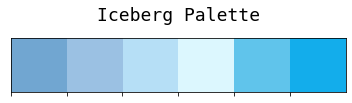

In [2]:
sns.palplot(['#71A6D1', '#9BC1E3', '#B6DFF6', '#DCF7FE', '#60C4EB', '#13ADEB'])
plt.title("Iceberg Palette", loc = 'center', fontfamily = 'monospace', fontsize = 18, y = 1.2);

Just for fun, secondary palette :

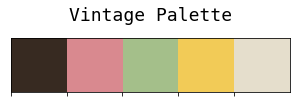

In [3]:
sns.palplot(['#372A21', '#D9898F', '#A4BF8A', '#F2CB57', '#E5DECC'])
plt.title("Vintage Palette", loc = 'center', fontfamily = 'monospace', fontsize = 18, y = 1.2);

Source, [Chart](https://earthworks.stanford.edu/catalog/princeton-6t053h65r) created in the 1890s

# II. Titanic Disaster <a class="anchor" id="chapter2"></a>
[Table of Content](#table_of_content)

RMS Titanic was a British passenger liner operated by the White Star Line and hailed as "unsinkable".<br> It sank in the Atlantic Ocean after striking an iceberg on the morning of 15 April 1912 during its maiden voyage from Southampton to New York City.<br> Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking of the Titanic one of the modern history's deadliest peacetime commercial marine disasters.

![Image of Titanic](https://fr.web.img3.acsta.net/r_654_368/newsv7/21/05/25/14/52/4327086.jpg)

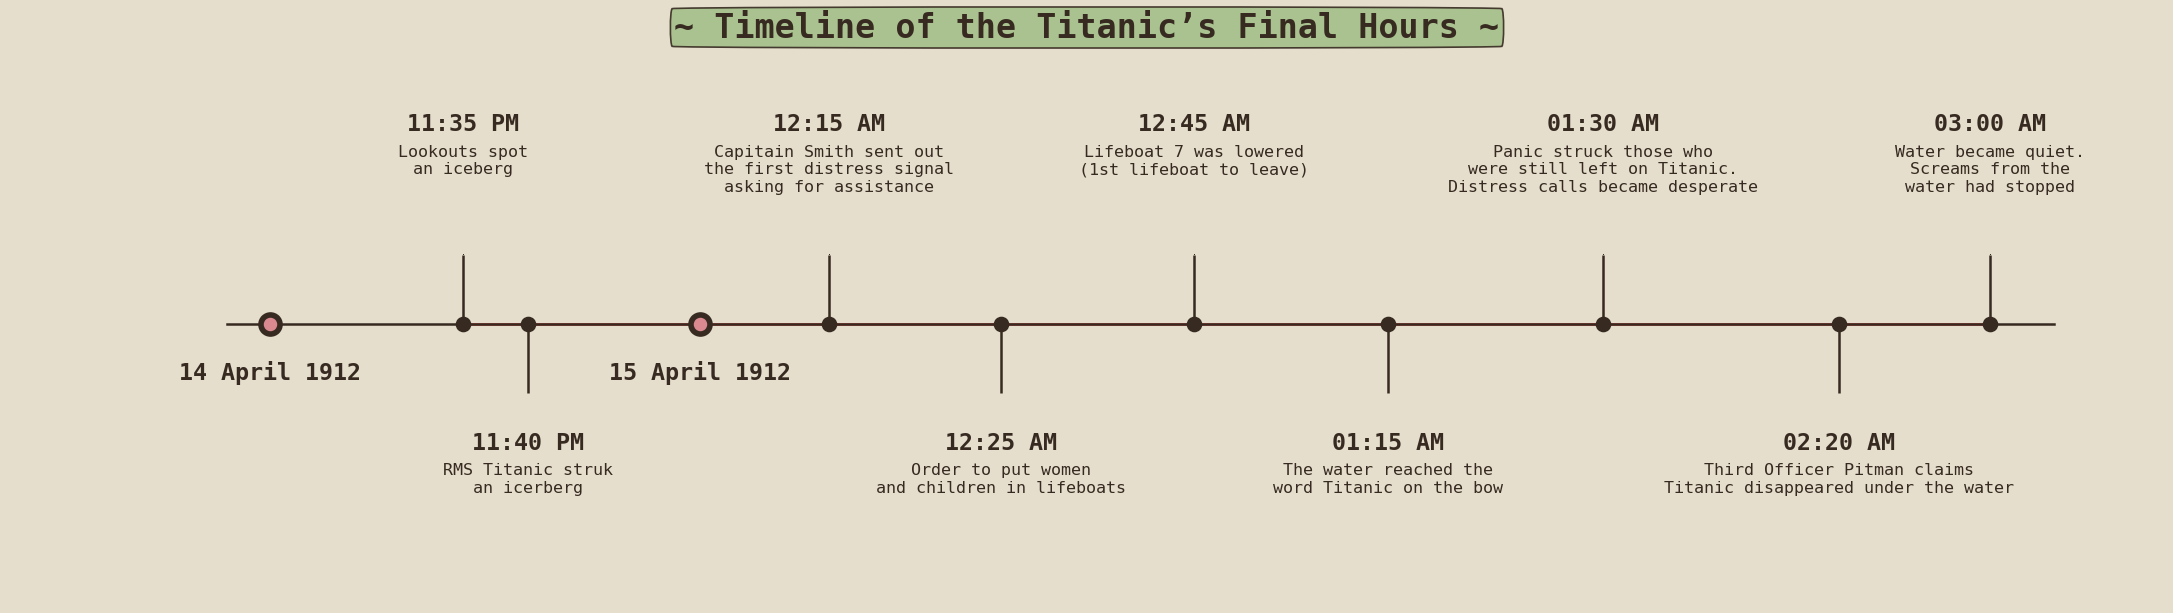

In [4]:
def timeline() :
    tl_dates = ["14 April 1912", "15 April 1912"]
    tl_x = [1.2, 3.2]

    tl_sub_x = [2.1, 2.4, 3.8, 4.6, 5.5, 6.4, 7.4, 8.5, 9.2]
    tl_sub_times = ["11:35 PM", "11:40 PM", "12:15 AM", "12:25 AM", "12:45 AM", "01:15 AM", "01:30 AM", "02:20 AM", "03:00 AM"]

    tl_text = ["Lookouts spot\nan iceberg",
               "RMS Titanic struk\nan icerberg",
               "Capitain Smith sent out\nthe first distress signal\nasking for assistance", 
               "Order to put women\nand children in lifeboats",
               "Lifeboat 7 was lowered\n(1st lifeboat to leave)",
               "The water reached the\nword Titanic on the bow",
               "Panic struck those who\nwere still left on Titanic.\nDistress calls became desperate",
               "Third Officer Pitman claims\nTitanic disappeared under the water",
               "Water became quiet.\nScreams from the\nwater had stopped"]

    # Set figure & Axes
    fig, ax = plt.subplots(figsize = (18, 5), 
                           constrained_layout = True, 
                           dpi = 120, 
                           facecolor = '#E5DECC')
    ax.set_facecolor('#E5DECC')
    ax.set_ylim(-2, 2)
    ax.set_xlim(0, 10)


    # Timeline : line
    ax.axhline(0, xmin = 0.1, xmax = 0.95, c = '#372A21', zorder = 1)
    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s = 190, c = '#372A21', zorder = 2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s = 50, c = '#D9898F', zorder = 3)
    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 70, c = '#372A21', zorder = 4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, -0.4, 
                date, 
                ha = 'center', 
                fontfamily = 'monospace', 
                fontweight = 'bold',
                fontsize = 14,
                color = '#372A21')
    
    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))    
    levels[::2] = 0.5
    levels[1::2] = -0.5
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)    
    plt.setp(baseline, zorder = 0)
    plt.setp(markerline, marker = ',', color = '#372A21')
    plt.setp(stemline, color = '#372A21')

    # Text
    for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
        ax.text(x, 2.3 * (idx%2) - 0.9, 
                time, 
                ha = 'center', 
                fontfamily = 'monospace', 
                fontweight = 'bold',
                fontsize = 14,
                color = '#372A21')
    
        ax.text(x, 2.3 * (idx%2) - 1, 
                txt,
                va = 'top', 
                ha = 'center', 
                fontfamily = 'monospace', 
                color = '#372A21')

    # Spine
    for spine in ["left", "top", "right", "bottom"] :
        ax.spines[spine].set_visible(False)

    # Ticks    
    ax.set_xticks([]) 
    ax.set_yticks([])

    # Title
    ax.set_title("~ Timeline of the Titanic’s Final Hours ~", 
                 fontweight = "bold", 
                 fontfamily = 'monospace', 
                 fontsize = 20, 
                 color = '#372A21', 
                 bbox = dict(boxstyle = 'round4', 
                             facecolor = '#A4BF8A', 
                             alpha = 0.9, 
                             pad = 0.14, 
                             edgecolor = '#372A21'));
timeline()

![Women and children first](https://sseahorse29.files.wordpress.com/2012/11/pg-3-titanic-itv.jpg)

The development of this project requires finding out how the passengers were evacuated and how the order **"Women & Children First "** was understood by the officers :

>"*The phrase was popularised by its usage on the RMS Titanic. The Second Officer suggested to Captain Smith : "Hadn't we better get the women and children into the boats, sir ?" to which the captain responded : "Put the women and children in and lower away". <br>The First and Second officers (William McMaster Murdoch and Charles Lightoller) interpreted the evacuation order differently; Murdoch took it to mean women and children first, while Lightoller took it to mean women and children only. <br>Second Officer Lightoller lowered lifeboats with empty seats if there were no women and children waiting to board, while First Officer Murdoch allowed a limited number of men to board if all the nearby women and children had embarked. <br>As a consequence, 74% of the women and 52% of the children on board were saved, but only 20% of the men. Some officers on the Titanic misinterpreted the order from Captain Smith, and tried to prevent men from boarding the lifeboats. <br>It was intended that women and children would board first, with any remaining free spaces for men. Because not all women and children were saved on the Titanic, the few men who survived, like White Star official J. Bruce Ismay, were initially branded as cowards.*"

Source, [Wikipedia](https://en.wikipedia.org/wiki/Women_and_children_first)

# III. Glimpse of the Datasets <a class="anchor" id="chapter3"></a>
[Table of Content](#table_of_content)

The Titanic competition was hosted in late 2012. It involved predicting whether passengers on the Titanic would survive or not..given a set of characteristics like their age, Sex, class of travel, port Embarked etc. <br>
The data set consists of a training data file and a test data file in CSV form. The files are very small. <br>
The aspiring data scientist is supposed to make his model 'learn' from the training data set (which contain an additional column on whether the passenger survived or not)<br>
and apply these 'learnings' to the test data set and predict which of the passengers in the test dataset survives.

- Training set (train.csv)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 columns for each of the 891 passengers. One of them is the `Survived` flag. Our ML algorithms are supposed to learn from this `df_train` and then predict the `Survived` column for the `df_test` which does NOT contain this column.<br>
Notice that 3 of these 11 columns in df_train have missing data for `Age`, `Cabin` & `Embarked`.

- Test set (test.csv)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


So we see that test data has 418 rows. It does NOT contain the `Survived` column. We have to predict this after we learn from the df_train. It has the remaining 11 columns and notice that here too `Age`, `Cabin` and `Fare` have missing data.

In [7]:
# Returns combined dataframe of training and test set

def combine_df(train_data, test_data) :
    return pd.concat([train_data, test_data], sort = True).reset_index(drop = True)

df = combine_df(df_train, df_test)

print(f'Combined dataset : {df.shape[0]} rows & {df.shape[1]} columns')

Combined dataset : 1309 rows & 12 columns


In [8]:
# Returns divided dataframes of training and test set
def divide_df(df_combine) :
    return df.loc[:890], df.loc[891:].drop(['Survived'], axis = 1)

#df_train, df_test = divide_df(df)

Now let's go through the features and describe a little :

<table><thead><tr><th>ATTRIBUTE</th><th>TYPE</th><th>DESCRIPTION</th><th>KEY</th></tr></thead><tbody><tr><td>Name</td><td rowspan="5">Nominal</td><td>Passenger Name</td><td></td></tr><tr><td>Ticket</td><td>Ticket Number</td><td></td></tr><tr><td>Cabin</td><td>Cabin Number</td><td></td></tr><tr><td>Embarked</td><td>Port of Embarkation</td><td>C - Cherbourg<br>Q - Queenstown<br>S - Southampton</td></tr><tr><td>Sex</td><td>Male or Female</td><td></td></tr><tr><td>Pclass</td><td>Ordinal</td><td>Proxy for socio-economic statut</td><td>1 - Upper<br>2 - Middle<br>3 - Lower</td></tr><tr><td>Passenger ID</td><td rowspan="4">Discrete</td><td>Unique identifing # for each passenger</td><td></td></tr><tr><td>SibSp</td><td># of Siblings or Spouses</td><td></td></tr><tr><td>Parch</td><td># of Parents or Children</td><td></td></tr><tr><td>Survived</td><td>Target variable</td><td>0 - No<br>1 - Yes</td></tr><tr><td>Age</td><td rowspan="2">Continuous</td><td>Passenger Age</td><td></td></tr><tr><td>Fare</td><td>Passenger Fare</td><td></td></tr></tbody></table>

SPECIAL NOTES :

The Titanic dataset contains information on 1309 passengers but no information on the crew.

Fare is in Pre-1970 British Pounds (£)
- Conversion Factors:  1£ = 12s = 240d and 1s = 20d

Age is in Years<br>
- Fractional if Age less than One (1)
- If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.<br>
- Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse : Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent : Mother or Father of Passenger Aboard Titanic
- Child : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch = 0 for them. <br>As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## 1. Data Cleaning <a class="anchor" id="section_3_1"></a>
[Table of Content](#table_of_content)

After doing some research it would appear that the [Kaggle](https://www.kaggle.com/c/titanic/data) datasets are derived almost certainly from the titanic3.csv file.<br>
There is a description of the dataset provided in the accompanying information file which also discusses its origins. According to this file, these datasets reflected the state of dataavailable as of **2 August 1999**.<br>
Comparing this file with the union of train.csv and test.csv reveals they are identical.

In short, the datasets have not been updated since 1999 and these inconsistency makes the data invalid and confusing when it comes to factual or historical value.<br>
[Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) data seems to be regarded as the most definitive source for information about the Titanic passengers.

In [9]:
# Compilation of errors we have noticed :
def errors (df) :
    # Age 
    df.loc[df['PassengerId'] == 631, 'Age'] = 47 # 80, actually used age at death
    df.loc[df['PassengerId'] == 117, 'Age'] = 66 # 70
    df.loc[df['PassengerId'] == 546, 'Age'] = 59 # 64
    df.loc[df['PassengerId'] == 988, 'Age'] = 25 # 76, actually used age at death
    df.loc[df['PassengerId'] == 223, 'Age'] = 41 # 51
    df.loc[df['PassengerId'] == 264, 'Age'] = 45 # 40
    df.loc[df['PassengerId'] == 1229, 'Age'] = 15 # 39
    df.loc[df['PassengerId'] == 1031, 'Age'] = 42 # 40
    df.loc[df['PassengerId'] == 799, 'Age'] = 45 # 30
    df.loc[df['PassengerId'] == 697, 'Age'] = 19 # 44
    df.loc[df['PassengerId'] == 290, ['Age', 'Name']] = [23, 'Connolly, Miss. Catherine "Kate"' ] # 22 & duplicates name
    df.loc[df['PassengerId'] == 898, 'Age'] = 41 # 30
    df.loc[df['PassengerId'] == 892, 'Age'] = 44 # 34
    df.loc[df['PassengerId'] == 684, 'Age'] = 12 # 14.5
    df.loc[df['PassengerId'] == 112, 'Age'] = 16 # 14.5
    df.loc[df['PassengerId'] == 10, 'Age'] = 17 # 14
    df.loc[df['PassengerId'] == 23, 'Age'] = 17 # 15
    df.loc[df['PassengerId'] == 675, 'Age'] = 18 # 30
    df.loc[df['PassengerId'] == 784, 'Age'] = 35 # NaN
    df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
    df.loc[df['PassengerId'] == 534, 'Age'] = 23 # NaN
    df.loc[df['PassengerId'] == 271, 'Age'] = 28 # 42
    df.loc[df['PassengerId'] == 1228, 'Age'] = 40 # 32
    df.loc[df['PassengerId'] == 781, 'Age'] = 17 # 12

    # Ford family
    df.loc[df['PassengerId'] == 87, ['Age', 'Parch', 'SibSp']] = [14, 1, 3] # 16, 3, 1
    df.loc[df['PassengerId'] == 148, ['Age', 'Parch', 'SibSp']] = [7, 1, 3] # 9, 2, 2
    df.loc[df['PassengerId'] == 737, ['Age', 'Parch']] = [54, 4] # 48, 3
    df.loc[df['PassengerId'] == 437, ['Age', 'Parch', 'SibSp']] = [20, 1, 3] # 21, 2, 2
    df.loc[df['PassengerId'] == 1059, ['Parch', 'SibSp']] = [1, 3] # 2, 2

    # Abbott family
    df.loc[df['PassengerId'] == 280, ['Age', 'Parch', 'SibSp']] = [39, 2, 0] # 35, 1, 1
    df.loc[df['PassengerId'] == 1284, ['Parch', 'SibSp']] = [1, 1] # 2, 0

    # Fare errors
    df.loc[df['PassengerId'] == 452	, ['Fare', 'Age']] = [6.19, 28] # 19, 26
    df.loc[df['PassengerId'] == 491, ['Fare', 'Age']] = [6.19, 19] # 19, 26

    # I found some children with this function : df[(df.Title == 'Miss') & (df.Parch != 0) & (df.Ticket_frequency > 1) & (df.Age.isnull())]
    df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
    df.loc[df['PassengerId'] == 230, 'Age'] = 12 # NaN
    df.loc[df['PassengerId'] == 410, 'Age'] = 3 # NaN
    df.loc[df['PassengerId'] == 486, 'Age'] = 8 # NaN
    df.loc[df['PassengerId'] == 889, 'Age'] = 7 # NaN

    # Passengers who travelled for free 
    df.loc[df['PassengerId'] == 873, 'Fare'] = 0 # Seaman 
    df.loc[df['PassengerId'] == 180, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 272, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 278, 'Age'] = 21 # 30 Guarantee group
    df.loc[df['PassengerId'] == 303, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 414, 'Age'] = 21 # 30 Guarantee group
    df.loc[df['PassengerId'] == 467, 'Age'] = 20 # 30 Guarantee group
    df.loc[df['PassengerId'] == 482, 'Age'] = 38 # 30 Guarantee group
    df.loc[df['PassengerId'] == 598, 'Ticket'] = 370160 # LINE Seaman
    df.loc[df['PassengerId'] == 634, 'Age'] = 29 # 42 Guarantee group
    df.loc[df['PassengerId'] == 733, 'Age'] = 42 # 30 Guarantee group
    df.loc[df['PassengerId'] == 816, 'Age'] = 39 # 42 Personal valet to Joseph Bruce Ismay
    df.loc[df['PassengerId'] == 1044, 'Ticket'] = 370160 # 3701 Seaman
    df.loc[df['PassengerId'] == 1015, ['Age', 'Ticket', 'Fare']] = [27, 370160, 0] # 28, 392095, 7.5 Guarantee group

    # Parch & SibSp
    df.loc[df['PassengerId'] == 69, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
    df.loc[df['PassengerId'] == 1106, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
    df.loc[df['PassengerId'] == 424, 'SibSp'] = 2 # 1 (Husband & Sister)
    df.loc[df['PassengerId'] == 611, 'SibSp'] = 2 # 1 (Husband & Sister)
    df.loc[df['PassengerId'] == 15, ['Parch', 'SibSp']] = [1, 2] # 0, 0, Child who travelled with his aunt
    df.loc[df['PassengerId'] == 1045, 'Parch'] = 3 # 2
    df.loc[df['PassengerId'] == 1155, 'SibSp'] = 2 # 1
    df.loc[df['PassengerId'] == 176, 'SibSp'] = 2 # 1
    df.loc[df['PassengerId'] == 897, 'Parch'] = 1 # 0

    # Samaan family
    df.loc[df['PassengerId'] == 1189, ['Age', 'Parch', 'SibSp']] = [40, 3, 0] # NaN, 0, 2
    df.loc[df['PassengerId'] == 49, ['Age', 'Parch', 'SibSp']] = [16, 1, 2] # NaN, 0, 2
    df.loc[df['PassengerId'] == 921, ['Age', 'Parch', 'SibSp']] = [17, 1, 2] # NaN, 0, 2
    df.loc[df['PassengerId'] == 1231, ['Age', 'Parch', 'SibSp']] = [10, 1, 2] # NaN, 0, 0, Child who travelled with his uncle & cousins

    # Sage family 
    df.loc[df['PassengerId'] == 160, 'Age'] = 5 # NaN
    df.loc[df['PassengerId'] == 181, 'Age'] = 7 # NaN
    df.loc[df['PassengerId'] == 202, 'Age'] = 16 # NaN
    df.loc[df['PassengerId'] == 325, 'Age'] = 19 # NaN
    df.loc[df['PassengerId'] == 793, 'Age'] = 20 # NaN
    df.loc[df['PassengerId'] == 847, 'Age'] = 18 # NaN
    df.loc[df['PassengerId'] == 864, 'Age'] = 14 # NaN
    df.loc[df['PassengerId'] == 1080, 'Age'] = 10 # NaN
    df.loc[df['PassengerId'] == 1234, 'Age'] = 44 # NaN
    df.loc[df['PassengerId'] == 1252, 'Age'] = 12 # 14.5
    df.loc[df['PassengerId'] == 1257, 'Age'] = 44 # NaN

    # Bourke family
    df.loc[df['PassengerId'] == 189, ['Age', 'Parch', 'SibSp']] = [42, 0, 2] # 40, 1, 1
    df.loc[df['PassengerId'] == 594, ['Age', 'Parch', 'SibSp']] = [40, 0, 2]  # NaN, 2, 0
    df.loc[df['PassengerId'] == 658, ['Parch', 'SibSp']] = [0, 2] # 1, 1

    # Ticket
    df.loc[df['PassengerId'] == 1079, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48873 
    df.loc[df['PassengerId'] == 566, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871
    df.loc[df['PassengerId'] == 812, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871
    df.loc[df['PassengerId'] == 901, ['Ticket', 'Fare']] = ['48871', 32.2] # A/4 48871

errors(df)

## 2. Statistic Summary <a class="anchor" id="section_3_2"></a>
[Table of Content](#table_of_content)

In [10]:
df.describe(exclude = ['object']) # Only NUMERIC data

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1079.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.545570,33.301975,0.382735,655.000000,2.294882,0.504202,0.383838
std,14.295271,51.765828,0.864368,378.020061,0.837836,1.045314,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.250000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.303125,0.000000,982.000000,3.000000,1.000000,1.000000
max,74.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [11]:
df.stb.counts(exclude = 'object') # Only NUMERIC data

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Survived,891,2,0.00,549,1.0000,342
Pclass,1309,3,3.00,709,2.0000,277
SibSp,1309,7,0.00,891,5.0000,6
Parch,1309,8,0.00,1001,6.0000,2
Age,1079,94,24.00,47,22.5000,1
Fare,1308,281,8.05,59,7.7792,1
PassengerId,1309,1309,1.00,1,1.0000,1


In [12]:
df.stb.freq(['Survived'], style = True)

,Survived,count,percent,cumulative_count,cumulative_percent
0,0.000000,549,61.62%,549,61.62%
1,1.000000,342,38.38%,891,100.00%


In [13]:
df.stb.freq(['Pclass'], style = True)

,Pclass,count,percent,cumulative_count,cumulative_percent
0,3,709,54.16%,709,54.16%
1,1,323,24.68%,"1,032",78.84%
2,2,277,21.16%,"1,309",100.00%


- Surprisingly, survival rate of the passengers is ~38%, which is the same result than the actual survival rate, whereas there are 418 lines missing in the test set
- More than half of the passengers were travelling in the 3rd class (~54%)
- Most of the passengers were under 30 years old
- Zeros-Fare needs investigation

In [14]:
df.describe(include = ['object']) # Only CATEGORICAL data

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1308,2,926
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


In [15]:
df.stb.counts(include = 'object') # Only CATEGORICAL data

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Sex,1309,2,male,843,female,466
Embarked,1307,3,S,914,Q,123
Cabin,295,186,C23 C25 C27,6,B24,1
Ticket,1309,926,CA. 2343,11,PC 17476,1
Name,1309,1308,"Kelly, Mr. James",2,"Laleff, Mr. Kristo",1


In [16]:
df.stb.freq(['Embarked'], style = True)

,Embarked,count,percent,cumulative_count,cumulative_percent
0,S,914,69.93%,914,69.93%
1,C,270,20.66%,"1,184",90.59%
2,Q,123,9.41%,"1,307",100.00%


- Most of the passengers boarded from Southampton
- `Ticket` feature has high ratio (~29%) of duplicate values (unique = 926)
- `Cabin` values have several dupicates across samples. Alternatively several passengers shared a cabin
- At first sight, `Name` column contains 2 "Kelly, Mr. James". This is not a duplicate : 
>"The body of fellow-third class passenger also named James Kelly was recovered".<br> 
Source, [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-victim/james-kelly.html)

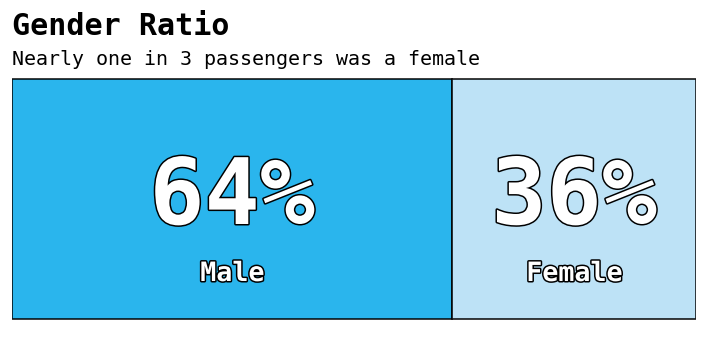

In [17]:
def gender_ratio() :
    mf_ratio = pd.crosstab(index = ['1'], columns = df.Sex, normalize = True)

    fig, ax = plt.subplots(1, 1, facecolor = 'white', figsize = (6, 2.5), dpi = 120)

    ax.barh(mf_ratio.index, mf_ratio['male'], 
            color = '#13ADEB', alpha = 0.9, label = 'Male', edgecolor = 'black')
    ax.barh(mf_ratio.index, mf_ratio['female'], left = mf_ratio['male'], 
            color = '#B6DFF6', alpha = 0.9, label = 'Female', edgecolor = 'black')

    ax.set(xlim = [0, 1])
    ax.tick_params(left = False, 
                   bottom = False, 
                   labelleft = False, 
                   labelbottom = False)

    for s in ['top', 'left', 'right', 'bottom'] :
        ax.spines[s].set_visible(False)

    for i in mf_ratio.index :
        ax.annotate(f"{mf_ratio['male'][i] :.0%}", 
                   xy = (mf_ratio['male'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])

        ax.annotate("Male", 
                   xy = (mf_ratio['male'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])

        ax.annotate(f"{mf_ratio['female'][i] :.0%}", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])
        ax.annotate("Female", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])

    fig.text(0.025, 1.05,'Gender Ratio', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         fontweight = 'bold',
         color = 'k')
    fig.text(0.025, 0.95,'Nearly one in 3 passengers was a female', 
         fontfamily = 'monospace', 
         fontsize = 12,
         color = 'k')

    ax.legend().set_visible(False)

    plt.tight_layout();
    
gender_ratio()

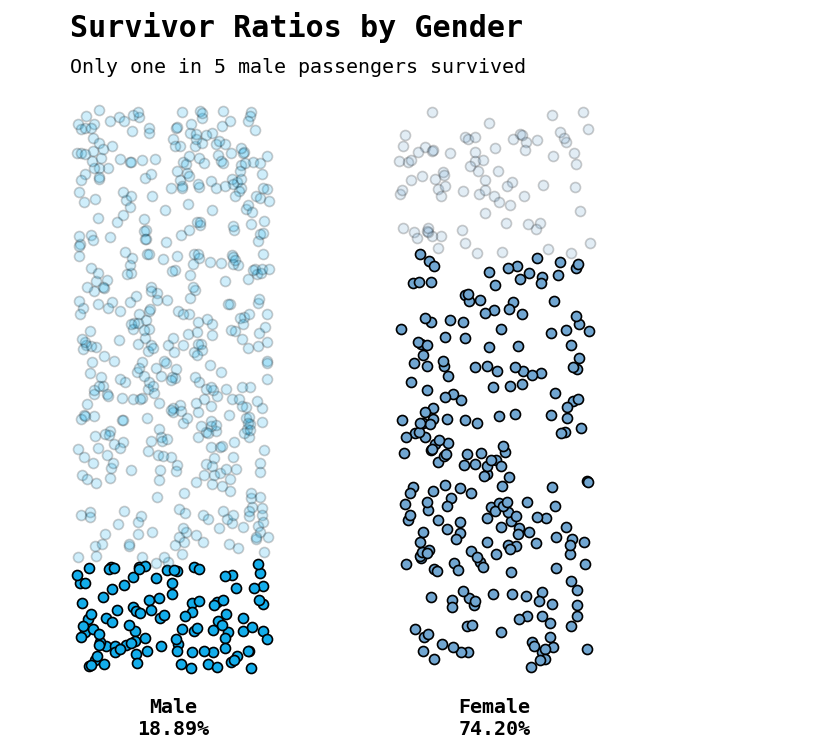

In [18]:
def survivor_ratios_by_gender() :
    survival_rate = df.groupby(['Sex']).mean()[['Survived']]
    male_rate = survival_rate.loc['male']
    female_rate = survival_rate.loc['female']

    male_pos = np.random.uniform(0, male_rate, len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)]))
    male_neg = np.random.uniform(male_rate, 1, len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)]))
    female_pos = np.random.uniform(0, female_rate, len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)]))
    female_neg = np.random.uniform(female_rate, 1, len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)]))

    fig, ax = plt.subplots(1, 1, figsize = (7, 6), dpi = 120)

    np.random.seed(42)

    # Male Stripplot
    ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), 
               male_pos, 
               color = '#13ADEB', 
               edgecolor = 'k', 
               label = 'Men Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), 
               male_neg, 
               color = '#13ADEB', 
               edgecolor = 'k', 
               alpha = 0.2, 
               label = 'Men Victims')

    # Female Stripplot
    ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_pos)),
               female_pos, 
               color = '#71A6D1', 
               edgecolor = 'k', 
               label ='Women Survivors')
    ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_neg)), 
               female_neg, 
               color = '#71A6D1', 
               edgecolor = 'k', 
               alpha = 0.2, 
               label = 'Women Victims')

    # Set Figure & Axes
    ax.set_xlim(-0.5, 2.0)
    ax.set_ylim(-0.03, 1.1)

    # Ticks
    ax.set_xticks([0, 1])
    ax.set_xticklabels([f'Male\n{male_rate[0] :.2%}', 
                        f'Female\n{female_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.tick_params(bottom = False)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.09, 1, 'Survivor Ratios by Gender', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18)    
    fig.text(0.09, 0.95, 'Only one in 5 male passengers survived', 
             fontfamily = 'monospace',
             fontsize = 12)    
    ax.legend().set_visible(False)

    plt.tight_layout();

survivor_ratios_by_gender()   

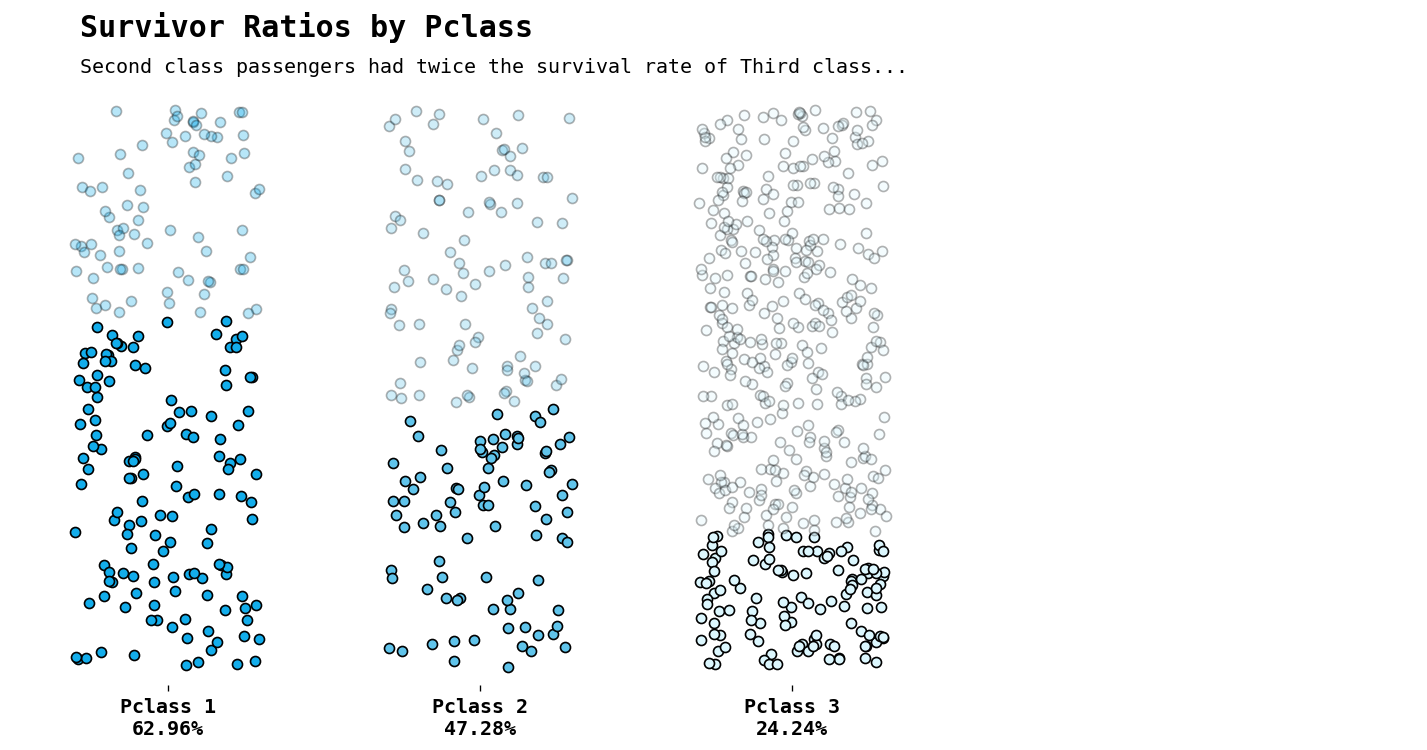

In [19]:
def survivor_ratios_by_Pclass() :
    survival_rate = df.groupby(['Pclass']).mean()[['Survived']]
    p1_rate = survival_rate.loc[1]
    p2_rate = survival_rate.loc[2]
    p3_rate = survival_rate.loc[3]

    p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)]))
    p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0)]))
    p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1)]))
    p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0)]))
    p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1)]))
    p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0)]))

    fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

    np.random.seed(42)

    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
               p1_pos, 
               color = '#13ADEB', 
               edgecolor = 'k', 
               label = 'Pclasse 1 Survivors')
    ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
               p1_neg, color = '#13ADEB', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 1 Victims')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
               p2_pos, 
               color = '#60C4EB', 
               edgecolor = 'k', 
               label = 'Pclasse 2 Survivors')
    ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
               p2_neg, 
               color = '#60C4EB', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 2 Victims')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
               p3_pos, 
               color = '#DCF7FE', 
               edgecolor = 'k', 
               label = 'Pclasse 3 Survivors')
    ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
               p3_neg, 
               color = '#DCF7FE', 
               edgecolor = 'k', 
               alpha = 0.3, 
               label = 'Pclasse 3 Victims')

    # Set Figure & Axes
    ax.set_xlim(-0.5, 4.0)
    ax.set_ylim(-0.03, 1.1)

    # Ticks
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                        f'Pclass 2\n{p2_rate[0] :.2%}', 
                        f'Pclass 3\n{p3_rate[0] :.2%}'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    ax.set_yticks([], minor = False)
    ax.set_ylabel('')

    # Spines
    for s in ["top", "right", "left", 'bottom'] :
        ax.spines[s].set_visible(False)

    # Title & Explanation
    fig.text(0.06, 1, 'Survivor Ratios by Pclass', 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18, 
             ha = 'left')    
    fig.text(0.06, 0.95, 'Second class passengers had twice the survival rate of Third class...', 
             fontfamily = 'monospace',
             fontsize = 12)
    ax.legend().set_visible(False)

    plt.tight_layout();

survivor_ratios_by_Pclass()

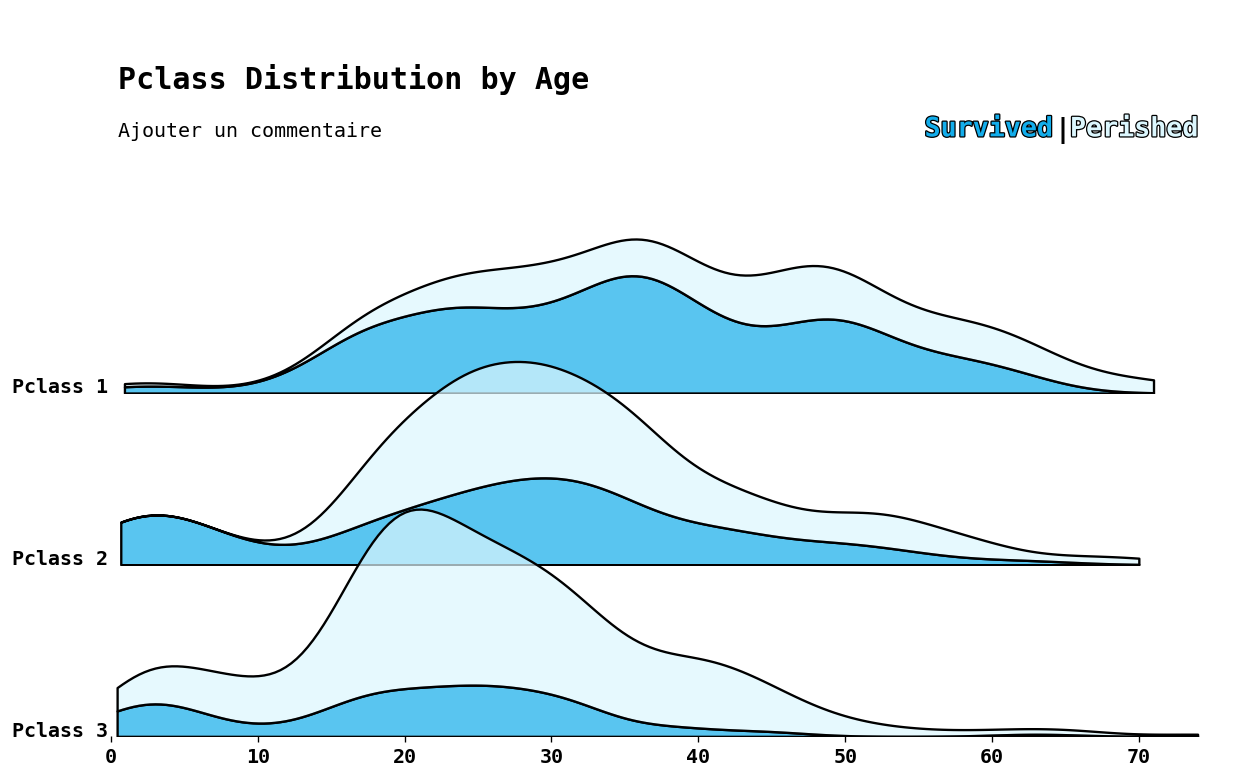

In [20]:
def Pclass_Distribution_by_Age() :
    fig = plt.figure(figsize = (12, 8), dpi = 120)
    gs = fig.add_gridspec(3, 1)
    gs.update(hspace = -0.55)

    axes = list()
    for idx, cls in zip(range(3), sorted(df['Pclass'].unique())) :
        axes.append(fig.add_subplot(gs[idx, 0]))
        sns.kdeplot(x = 'Age', 
                    data = df[df['Pclass'] == cls], 
                    fill = True,
                    ax = axes[idx],
                    cut = 0,
                    bw_method = 0.25, 
                    lw = 1.4,
                    edgecolor = 'black',
                    hue = 'Survived', 
                    palette = {0 : "#DCF7FE", 1 : "#13ADEB"},
                    multiple = 'stack',
                    alpha = 0.7) 
    
        axes[idx].set_ylim(0, 0.065)
        axes[idx].set_xlim(0, 76)
        axes[idx].set_yticks([])
        if idx != 2 : axes[idx].set_xticks([])
        axes[idx].set_ylabel('')
        axes[idx].set_xlabel('')
    
        axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
        
        axes[idx].patch.set_alpha(0)
        axes[idx].text(-0.2, 0, 
                       f"Pclass {cls}",
                       fontweight = "bold", 
                       fontfamily = 'monospace', 
                       fontsize = 12,
                       ha = "right")
        if idx != 3 : axes[idx].get_legend().remove()
    axes[2].set_xticks(np.arange(0, 80, 10))
    axes[2].set_xticklabels(('0', '10', '20', '30', '40', '50', '60', '70'),
                            fontweight = 'bold', 
                            fontfamily = 'monospace', 
                            fontsize = 12)
    fig.text(0.13, 0.8, "Pclass Distribution by Age",
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             fontsize = 18, 
             ha = 'left')
    fig.text(0.13, 0.75, 'Ajouter un commentaire', 
             fontfamily = 'monospace',
             fontsize = 12)
    fig.text(0.690, 0.75, 'Survived', 
             fontsize = 16, 
             fontweight = 'bold', 
             fontfamily = 'monospace', 
             ha = 'left',
             color = '#13ADEB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.780, 0.75, '|', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = 'black')
    fig.text(0.791, 0.75, 'Perished', 
             fontsize = 16, 
             fontweight = 'bold',
             fontfamily = 'monospace',
             color = '#DCF7FE', 
             path_effects = [pe.withStroke(linewidth = 1.5, 
                                           foreground = "black")]);

Pclass_Distribution_by_Age()

## 3. Missing Values & Duplicates <a class="anchor" id="section_3_3"></a>
[Table of Content](#table_of_content)

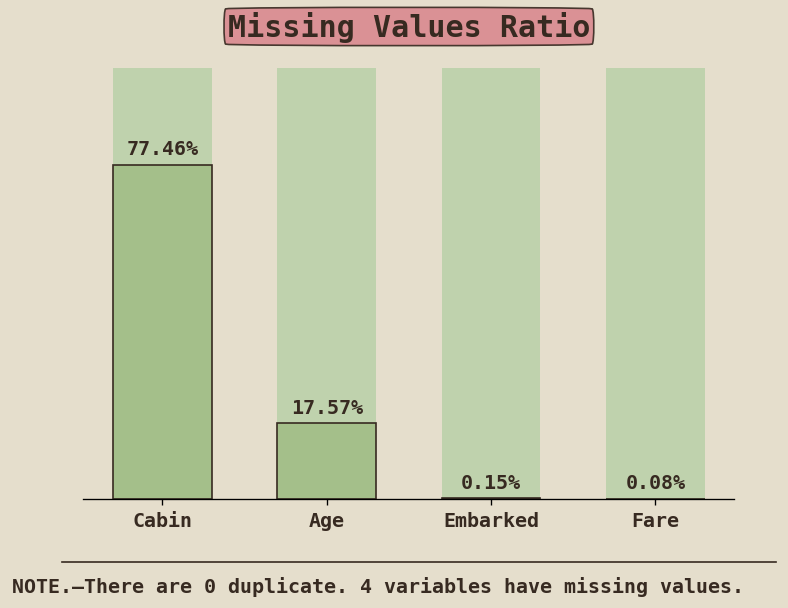

In [21]:
def missing_values_ratio() :
    drop_survived = df.drop('Survived', axis = 1)
    nan_data = (drop_survived.isna().sum().sort_values(ascending = False) / len(df) * 100)[:4]

    fig, ax = plt.subplots(1, 1, figsize = (7, 5), 
                           facecolor = '#E5DECC', 
                           dpi = 120)
    ax.set_facecolor('#E5DECC')

    ax.bar(nan_data.index, 100, color = '#bfd2ad', width = 0.6)
    bar = ax.bar(nan_data.index, nan_data, color = '#A4BF8A', width = 0.6, edgecolor = '#372A21')

    ax.bar_label(bar, 
                 fmt = '%.2f%%',
                 padding = 4,
                 fontsize = 12, 
                 fontfamily = 'monospace',
                 fontweight = 'bold',
                 color = '#372A21')

    ax.spines[["top", "right", "left"]].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks(nan_data.index)
    ax.set_xticklabels(['Cabin', 'Age', 'Embarked', 'Fare'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12, 
                       color = '#372A21')
    ax.set_title('Missing Values Ratio', 
                 fontweight = "bold", 
                 fontfamily = 'monospace', 
                 fontsize = 18, 
                 color = '#372A21', 
                 bbox = dict(boxstyle = 'round4', 
                             facecolor = '#D9898F',
                             alpha = 0.9, 
                             pad = 0.14, 
                             edgecolor = '#372A21'))

    l1 = lines.Line2D([0.1, 0.95], 
                      [0.02, 0.02], 
                      transform = fig.transFigure, 
                      figure = fig, 
                      color = '#372A21', 
                      lw = 1)
    fig.lines.extend([l1])

    fig.text(0.04, -0.03, f'NOTE.—There are {drop_survived.duplicated().sum()} duplicate. {len(drop_survived.columns[drop_survived.isna().any()].tolist())} variables have missing values.', 
             fontfamily = 'monospace',
             fontweight = 'bold',
             fontsize = 12,
             color = '#372A21');

missing_values_ratio()

- With 77% missing data the `Cabin` info seems pretty useless 😟
- Roughly 1 in 5 `Age` are missing
- The `Embarked` needs to be fixed and we also have 1 `Fare` missing from the test set

# IV. Data Prepocessing <a class="anchor" id="chapter4"></a>
[Table of Content](#table_of_content)
## 1. Feature Engineering <a class="anchor" id="section_4_1"></a>

This first chapter of feature engineering is intended to allow us to fill in the missing values. Nevertheless, you will also find analyses of some variables that will be useful for the rest of our cruise.

### Name Extraction <a class="anchor" id="section_4_1_1"></a>

In [22]:
# Use a regular expression to search for a title. 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [23]:
pd.crosstab(df.Title, df.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


All the titles belongs to one kind of gender except for "Dr".
>Note : "Master" is an English honorific for boys and young men. According to the data, the title 'Master' refers to boys aged 14 or younger.

In addition to condensing the title into smaller and more meaningful categories, we need to list all the children on board the Titanic.

In [24]:
# Feature Subset Selection
def replace_titles(x) :
    title = x['Title']
    if title in ['Dr'] : # Dr to Mr or Mrs
        return 'Mr' if x['Sex'] == 'male' else 'Mrs'
    elif title in ['Don', 'Sir', 'Capt', 'Col', 'Major', 'Rev', 'Jonkheer', 'Mr'] : # Male titles to Mr or Children
        return 'Children' if x['Age'] < 14.5 else 'Mr'
    elif title in ['Master'] : # Master to Children
        return 'Children'
    elif title in ['Lady', 'Countess', 'Dona', 'Mme', 'Miss', 'Mlle', 'Ms', 'Mrs'] : # Female titles to Children or Mrs
        return 'Children' if x['Age'] < 14.5 else 'Mrs'
    else :
        return title

# Run the function
df['Title'] = df.apply(replace_titles, axis = 1)

In [25]:
pd.crosstab(df.Title, 
            df.Sex,
            margins = True,
            margins_name = 'Subtotals')

Sex,female,male,Subtotals
Title,,,
Children,56,67,123
Mr,0,776,776
Mrs,410,0,410
Subtotals,466,843,1309


Fantastic ! [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/children-on-titanic/) counts 128 children on the Titanic. Five children are not included in our data set :
- 2 crew members
- 3 cross-channel passengers — *Southampton* to *Cherbourg*

With the help of the function and some data cleaning, we found all 123 children. 🥳

### Title Label Encoding <a class="anchor" id="section_4_1_3"></a>
[Table of Content](#table_of_content)

In [26]:
# Convert Title to ordinal variable
df['Title_Encoding'] = df["Title"].map({"Children" : 0, "Mr" : 1, "Mrs" : 2})

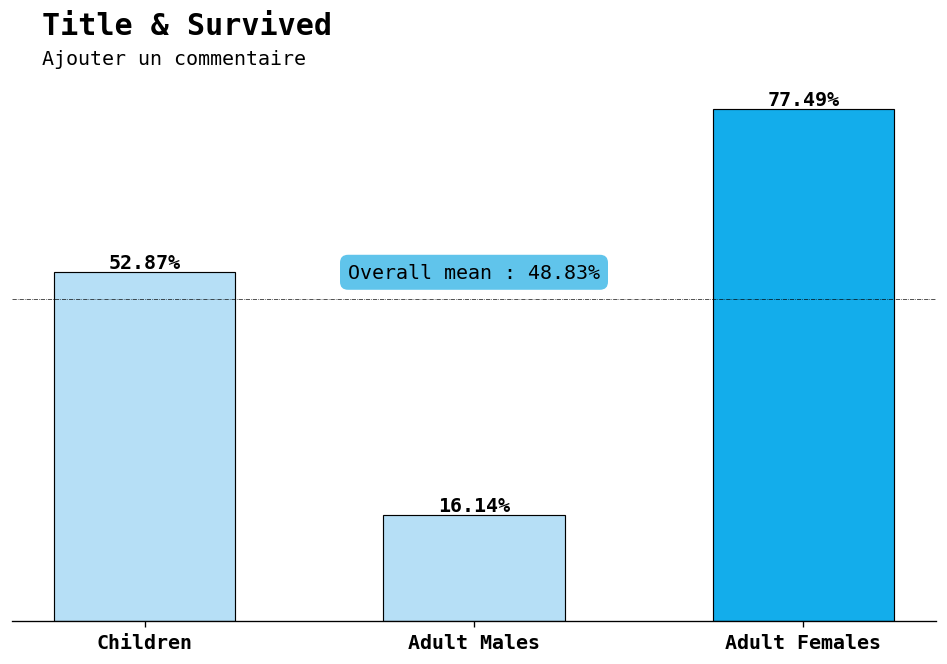

In [27]:
title_ratio = df.groupby('Title_Encoding')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi = 120)

color_map = ['#B6DFF6' for _ in range(len(title_ratio))]
color_map[np.argmax(title_ratio)] = ['#13ADEB'][0]


bars = ax.bar(title_ratio.index, 
              title_ratio, 
              color = color_map, 
              width = 0.55, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df.groupby('Title_Encoding')['Survived'].mean().mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Overall mean : {mean :.2f}%", 
            xy = (1, mean + 4),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Title & Survived', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(title_ratio.index)
ax.set_xticklabels(['Children', 'Adult Males', 'Adult Females'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.set_ylim(0, 80)

fig.tight_layout()

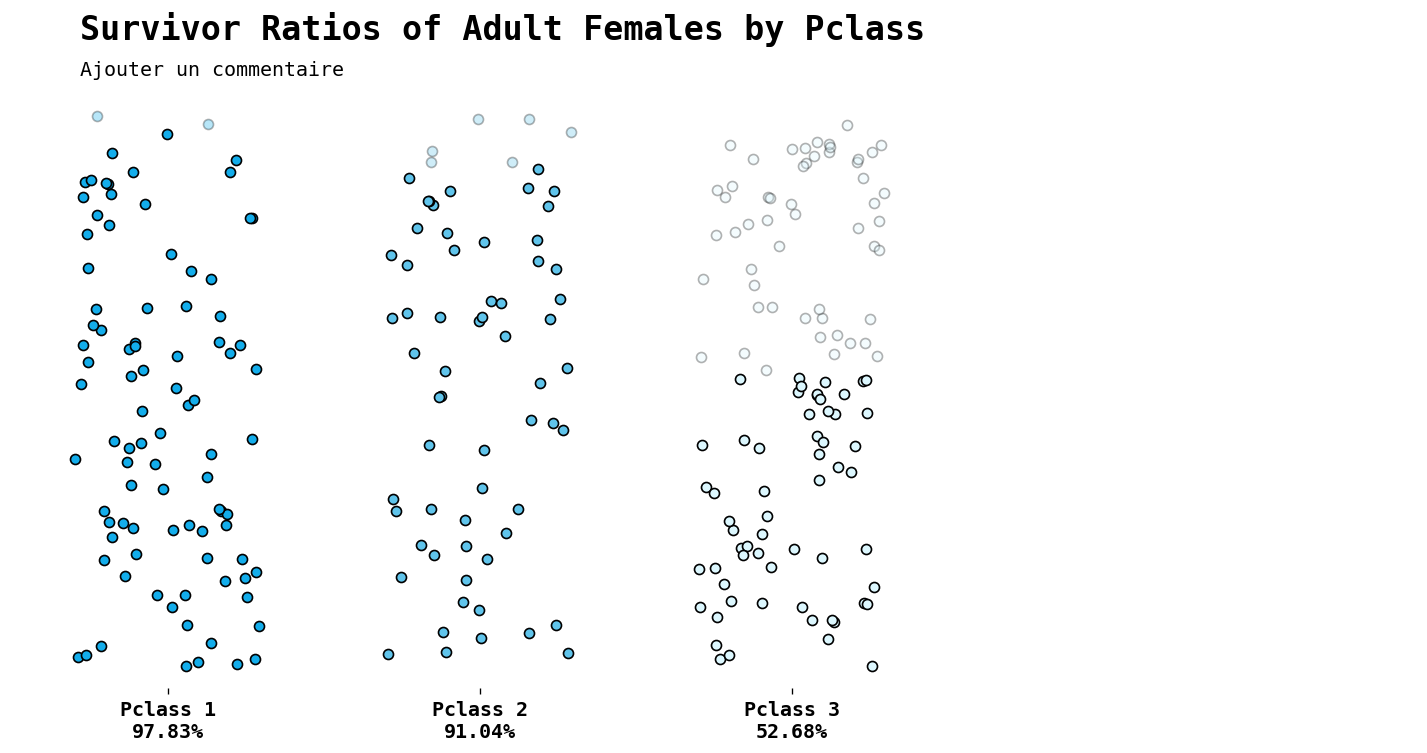

In [28]:
female_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = female_survival_rate.loc[1, 2]
p2_rate = female_survival_rate.loc[2, 2]
p3_rate = female_survival_rate.loc[3, 2]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Adult Females Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Adult Females Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Adult Females Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Adult Females Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Adult Females Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Adult Females Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                    f'Pclass 2\n{p2_rate[0] :.2%}', 
                    f'Pclass 3\n{p3_rate[0] :.2%}'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1, 'Survivor Ratios of Adult Females by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.06, 0.95, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend().set_visible(False)

plt.tight_layout();

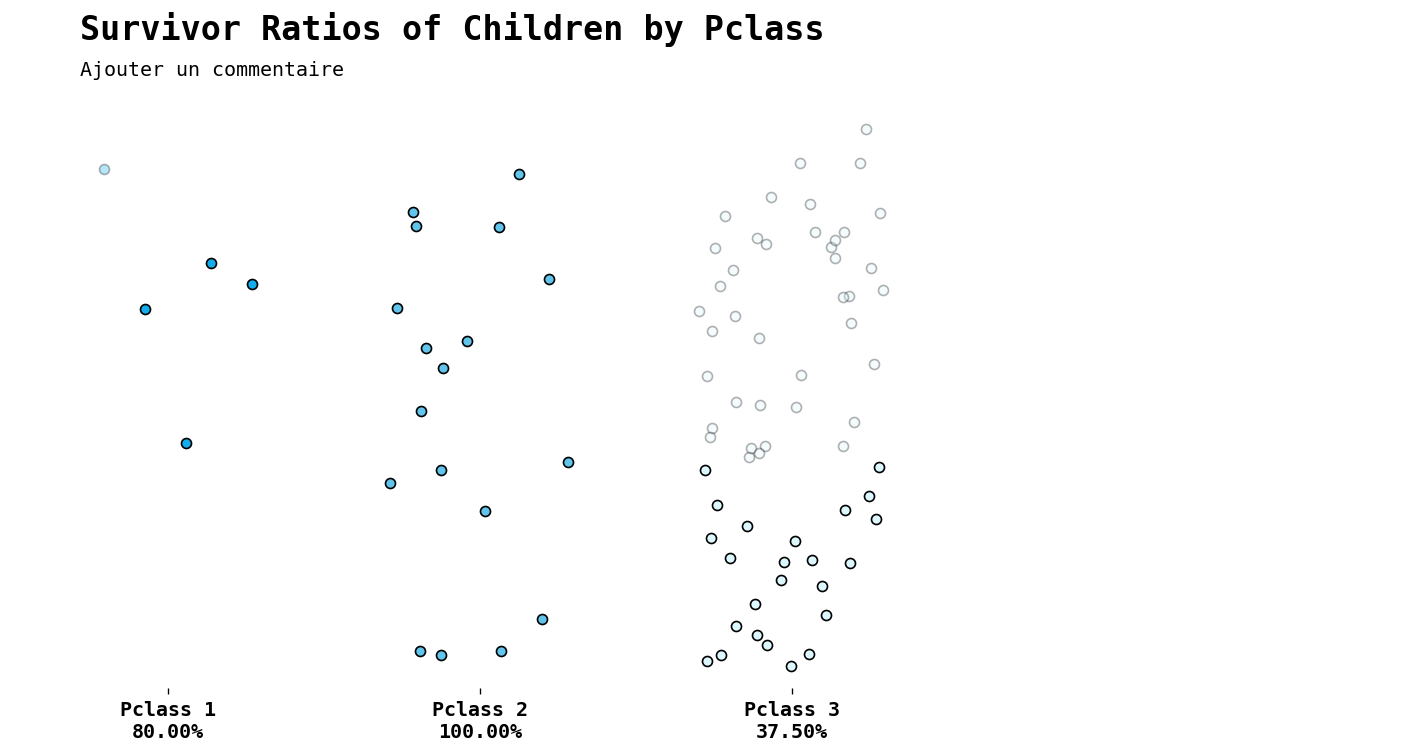

In [29]:
children_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = children_survival_rate.loc[1, 0]
p2_rate = children_survival_rate.loc[2, 0]
p3_rate = children_survival_rate.loc[3, 0]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Children Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Children Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Children Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Children Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Children Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Children Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                    f'Pclass 2\n{p2_rate[0] :.2%}', 
                    f'Pclass 3\n{p3_rate[0] :.2%}'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1, 'Survivor Ratios of Children by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.06, 0.95, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend().set_visible(False)

plt.tight_layout();

In [30]:
len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)])

4

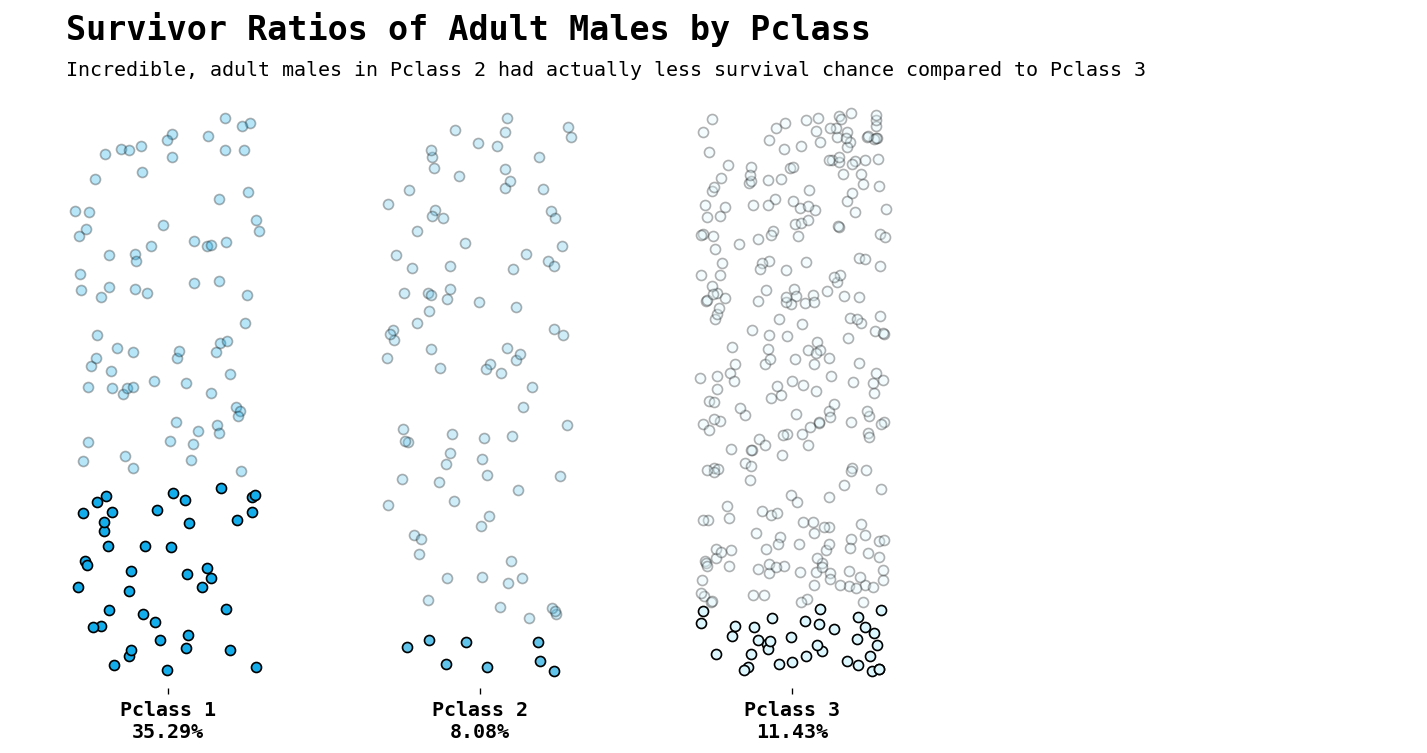

In [31]:
male_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = male_survival_rate.loc[1, 1]
p2_rate = male_survival_rate.loc[2, 1]
p3_rate = male_survival_rate.loc[3, 1]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 120)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Adult Males Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Adult Males Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Adult Males Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Adult Males Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Adult Males Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Adult Males Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] :.2%}', 
                    f'Pclass 2\n{p2_rate[0] :.2%}', 
                    f'Pclass 3\n{p3_rate[0] :.2%}'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.05, 1, 'Survivor Ratios of Adult Males by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.05, 0.95, 'Incredible, adult males in Pclass 2 had actually less survival chance compared to Pclass 3', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend().set_visible(False)

plt.tight_layout();

### Ticket Frequency Encoding <a class="anchor" id="section_4_1_4"></a>
[Table of Content](#table_of_content)

Many passengers travelled along with groups. Those groups consist of family, friends, neighbours, nannies, maids etc.<br>In most cases, they had the same ticket number

In [32]:
# Creating new feature
df['Ticket_frequency'] = df['Ticket'].map(df['Ticket'].value_counts())

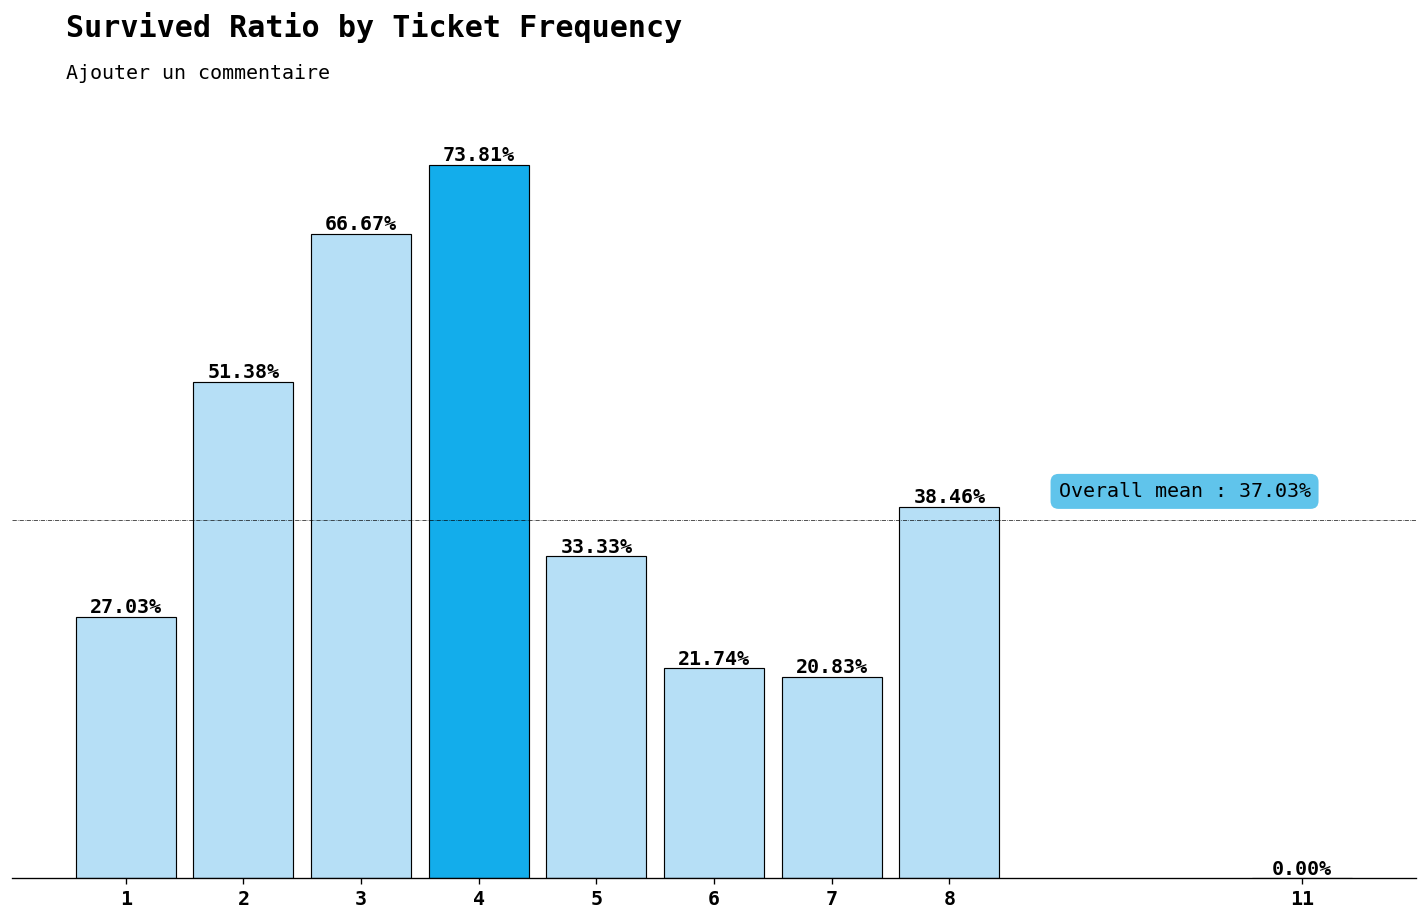

In [34]:
ticket_ratio = df.groupby('Ticket_frequency')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 120)

color_map = ['#B6DFF6' for _ in range(len(ticket_ratio))]
color_map[np.argmax(ticket_ratio)] = ['#13ADEB'][0]


bars = ax.bar(ticket_ratio.index, 
              ticket_ratio, 
              color = color_map, 
              width = 0.85, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df.groupby('Ticket_frequency')['Survived'].mean().mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Overall mean : {mean :.2f}%", 
            xy = (10, mean + 3),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Survived Ratio by Ticket Frequency', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(ticket_ratio.index)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_ylim(0, 80)

fig.tight_layout()

### Parch & SibSp Synthesis <a class="anchor" id="section_4_1_5"></a>
[Table of Content](#table_of_content)

`SibSp` and `Parch` can be combined into a new attribute FamilySize to give a better overview of the passengers with families.

In [36]:
# Creating new feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

⚠️ `FamilySize` excludes friends, neighbours, uncles, aunts, nieces, nephews, cousins, brothers & sisters-in-law

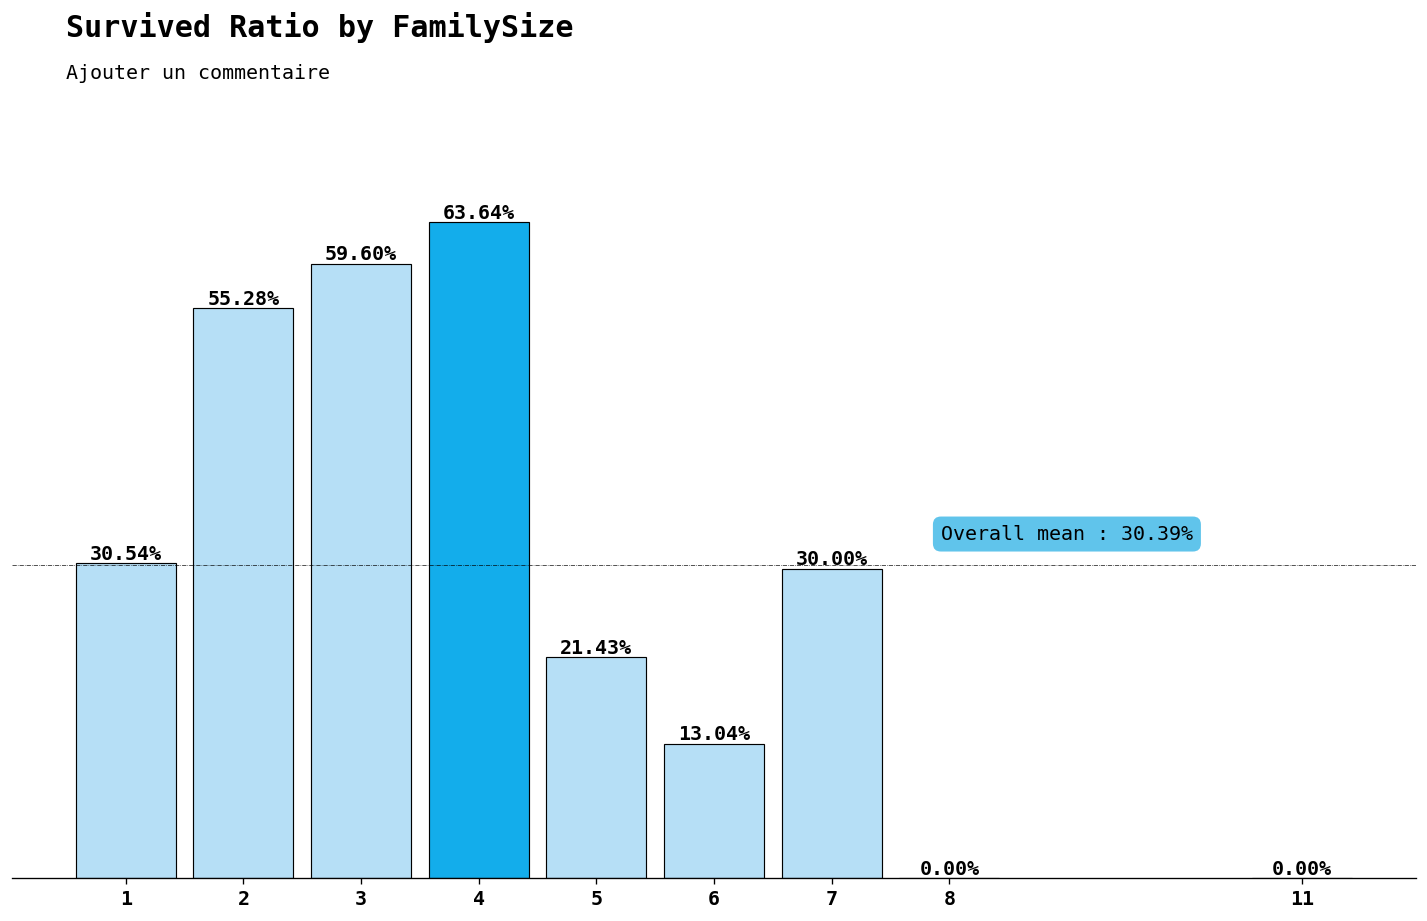

In [37]:
family_ratio = df.groupby('FamilySize')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 120)

color_map = ['#B6DFF6' for _ in range(len(family_ratio))]
color_map[np.argmax(family_ratio)] = ['#13ADEB'][0]


bars = ax.bar(family_ratio.index, 
              family_ratio, 
              color = color_map, 
              width = 0.85, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df.groupby('FamilySize')['Survived'].mean().mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Overall mean : {mean :.2f}%", 
            xy = (9, mean + 3),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Survived Ratio by FamilySize', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(family_ratio.index)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_ylim(0, 75)

fig.tight_layout()

### FamilySize & Ticket_frequency Synthesis <a class="anchor" id="section_4_1_7"></a>
[Table of Content](#table_of_content)

In [41]:
print(f"There are {len(df[df['FamilySize'] != df['Ticket_frequency']])} rows where FamilySize does not match with Ticket_frequency")

There are 295 rows where FamilySize does not match with Ticket_frequency


Let us take the max of FamilySize & Ticket_frequency.

In [39]:
# Create a new column called GroupSize
df['GroupSize'] = df[['FamilySize','Ticket_frequency']].max(axis = 1)

Let's be honest, even though we have synthesised `Ticket_frequency` and `Family_Size`, our new variable has no factual or historical relevance.<br>
As we saw earlier, `Family_Size` excludes friends, neighbours, nephews, uncles, mistresses, cousins, etc. Moreover, `Family_Size` has not been updated since 1999, so there are many inconsistencies.<br>
As for Ticket_Frequency, some passengers travelled together with different ticket numbers. In 1912, it was customary to separate families into two groups, men in one cabin and women in another. This is just one example among many...

Nevertheless, let us now explore this new attribute

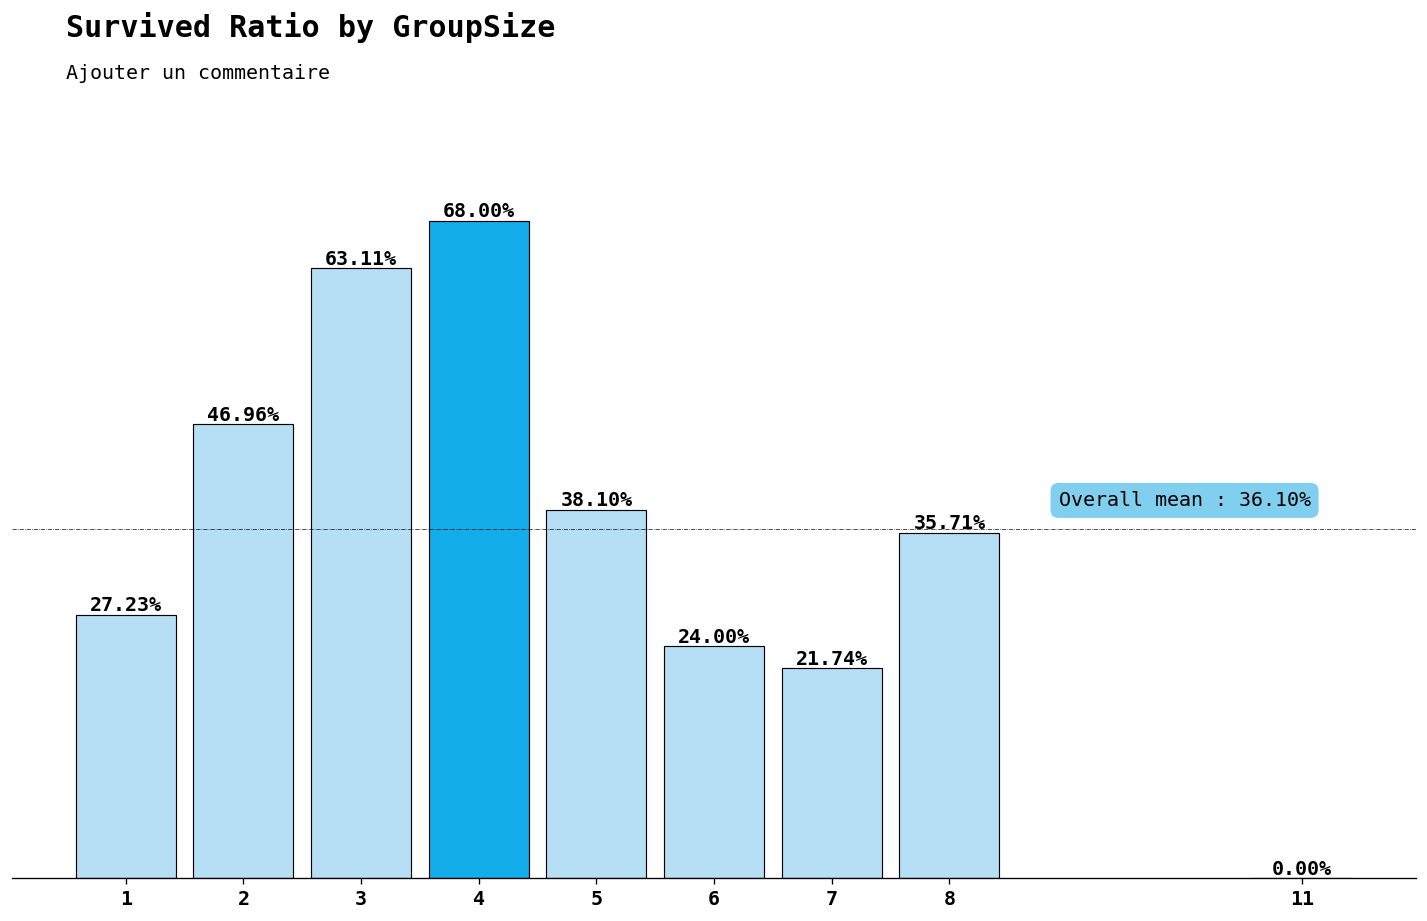

In [40]:
group_ratio = df.groupby('GroupSize')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 120)

color_map = ['#B6DFF6' for _ in range(len(group_ratio))]
color_map[np.argmax(group_ratio)] = ['#13ADEB'][0]


bars = ax.bar(group_ratio.index, 
              group_ratio, 
              color = color_map, 
              width = 0.85, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
#mean = df['Survived'].mean() * 100
mean = df.groupby('GroupSize')['Survived'].mean().mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Overall mean : {mean :.2f}%", 
            xy = (10, mean + 3),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0,
                        alpha = 0.8))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Survived Ratio by GroupSize', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(group_ratio.index)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_ylim(0, 80)

fig.tight_layout()

- It appears that solo travellers are at high risk.
- From 2-4 groups though the survival rate is higher and then 5 onwards the survival rate dips completely.

Intuitively, if you are travelling in a larger group, you would perhaps be made aware faster of the impending tragedy because of the sheer size of the group.<br>
Conversely, hand lone travellers, may have been slept soundly in their bunks and may have gotten the news late.<br>
On the other hand, as the group size increases, it may become more and more difficult to get everyone together and to safety, so perhaps with larger group size the trend turns negative and survivals dip.

While this may be true, our assumption is that this could be a case of correlation rather than causation.<br>
In short, `Pclass = 3` is the cause of high mortality and `GroupSize > 4` is simply correlated with higher mortality.

In [101]:
# .notnull() excludes df_test 
print(f'Pclass 1 & 2 in GroupSize between 2-4 : {len(df[(df.GroupSize.between(2, 4)) & (df.Pclass.between(1, 2)) & (df.Survived.notnull())])} passengers') 
print(f'Pclass 3 in GroupSize between 2-4 : {len(df[(df.GroupSize.between(2, 4)) & (df.Pclass == 3) & (df.Survived.notnull())])} passengers')
print(f'Pclass 1 & 2 in GroupSize > 4 : {len(df[(df.GroupSize > 4) & (df.Pclass.between(1, 2)) & (df.Survived.notnull())])} passengers')
print(f'Pclass 3 in GroupSize > 4 : {len(df[(df.GroupSize > 4) & (df.Pclass == 3) & (df.Survived.notnull())])} passengers')

Pclass 1 & 2 in GroupSize between 2-4 : 221 passengers
Pclass 3 in GroupSize between 2-4 : 132 passengers
Pclass 1 & 2 in GroupSize > 4 : 26 passengers
Pclass 3 in GroupSize > 4 : 64 passengers


Yep ! The data is as clear as it can be.<br>
Large groups were more prevalent in class 3 (~ 71%), which was less likely to survive anyway depending on the class of travel.<br>
It is a corelation not a causation !

However, we have observed that being alone increases the mortality rate. Let's quickly see if this is true.

In [102]:
print(f'Mortality rate solo passengers : {len(df[(df.GroupSize == 1) & (df.Survived == 0)]) / len(df[(df.GroupSize == 1) & (df.Survived.notnull())]) :.2%}')
print(f'Mortality rate solo adult males : {len(df[(df.GroupSize == 1) & (df.Survived == 0) & (df.Title_Encoding == 1)]) / len(df[(df.GroupSize == 1) & (df.Title_Encoding == 1) & (df.Survived.notnull())]) :.2%}')
print(f'Mortality rate solo adult female : {len(df[(df.GroupSize == 1) & (df.Survived == 0) & (df.Title_Encoding == 2)]) / len(df[(df.GroupSize == 1) & (df.Title_Encoding == 2) & (df.Survived.notnull())]) :.2%}')
print(f'Pclass 1 & 2 in GroupSize = 1 : {len(df[(df.GroupSize == 1) & (df.Pclass.between(1, 2)) & (df.Survived.notnull())])} passengers')
print(f'Pclass 3 in GroupSize = 1 : {len(df[(df.GroupSize == 1) & (df.Pclass == 3) & (df.Survived.notnull())])} passengers')

Mortality rate solo passengers : 72.77%
Mortality rate solo adult males : 84.59%
Mortality rate solo adult female : 26.37%
Pclass 1 & 2 in GroupSize = 1 : 153 passengers
Pclass 3 in GroupSize = 1 : 295 passengers


Solo females do not follow this trend. However, it can be said that this is not a fair comparison as females have a better survival rate anyway.<br>
Furthermore, solo passengers travelled more in `Pclass 3` (~ 65%), which may explain their high overall mortality rate.

A stacked percentage bar chart would be useful for studying the ratio of classes in GroupSize.

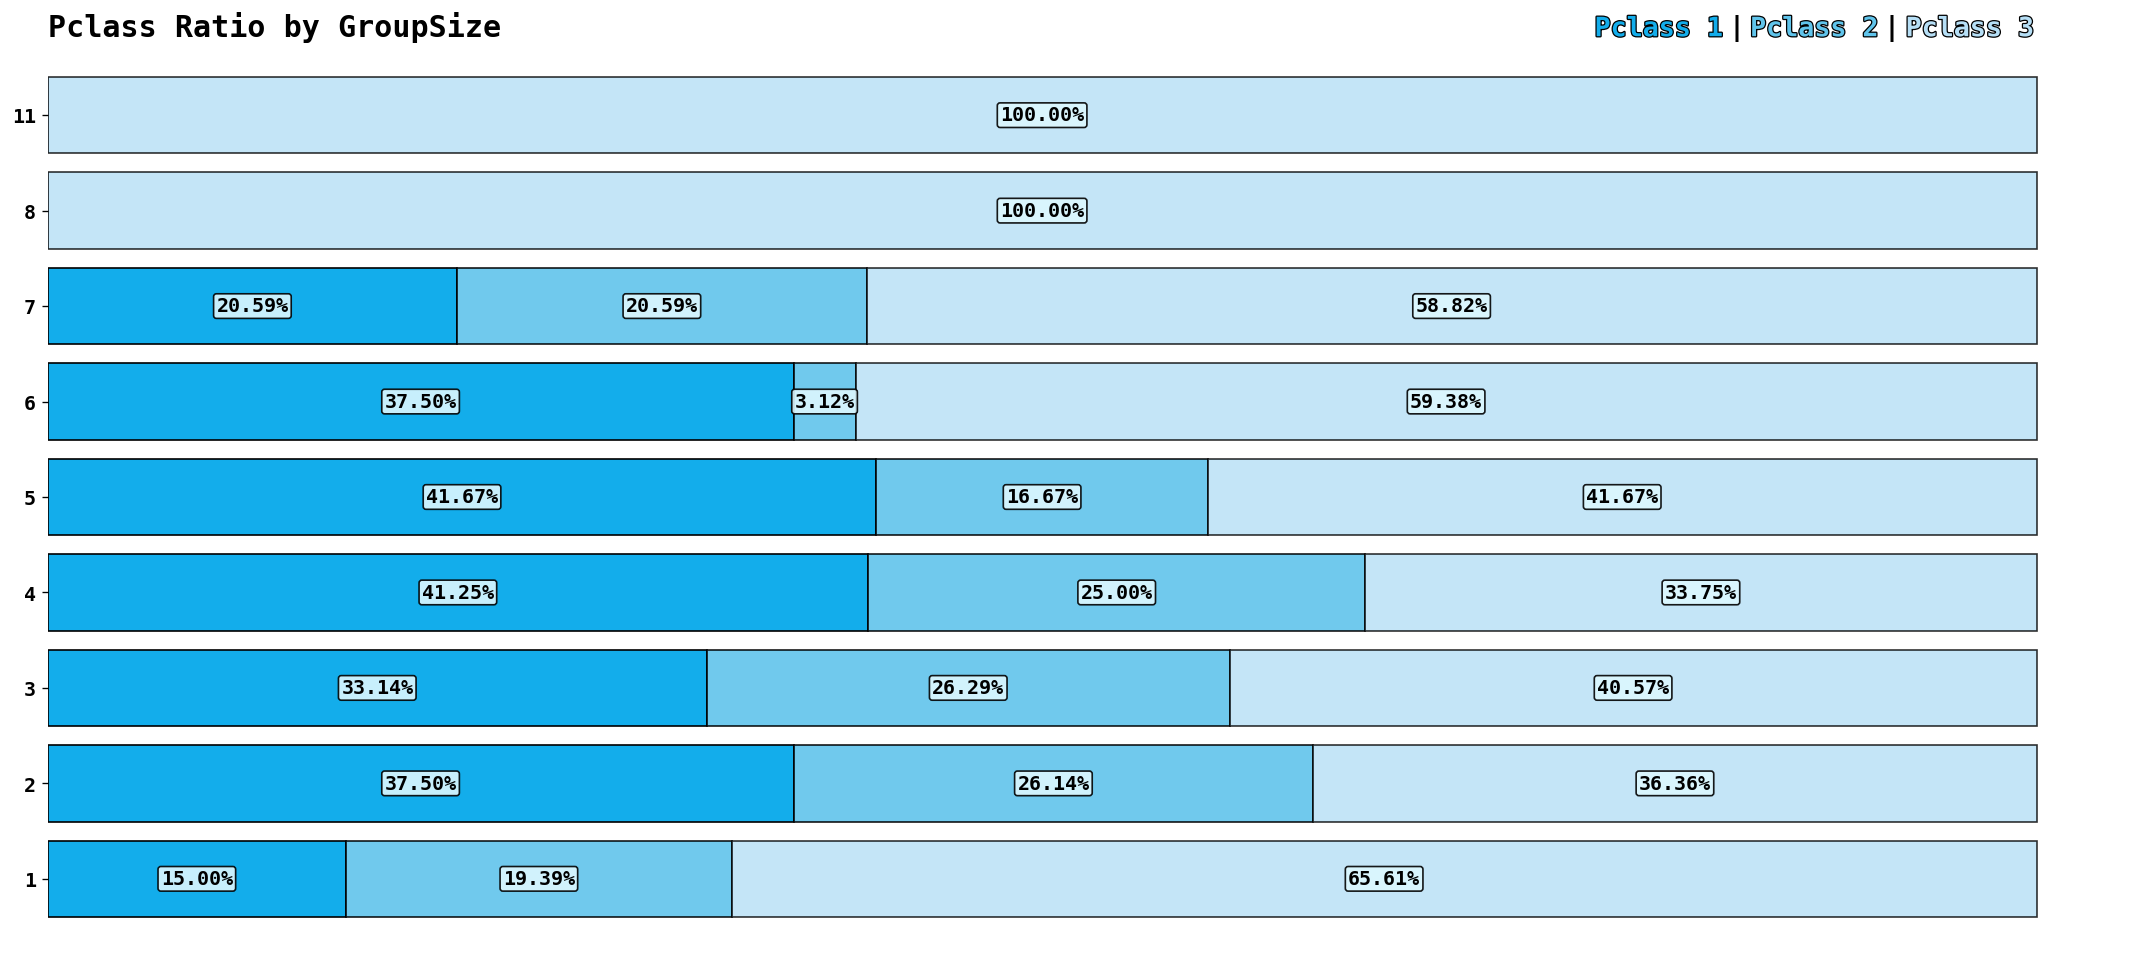

In [103]:
def pclass_ratio_in_groupsize() :
    data = pd.crosstab(df['GroupSize'], df['Pclass'], normalize = 'index')

    fig, ax = plt.subplots(1, 1, figsize=(18, 8), dpi = 120)

    ax.barh(np.arange(1, 10, 1), data[1], color = '#13ADEB', alpha = 1, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data[2], left = data[1], color='#60C4EB', alpha = 0.9, edgecolor = 'black')
    ax.barh(np.arange(1, 10, 1), data[3], left = data[1] + data[2], color='#B6DFF6', alpha = 0.8, edgecolor = 'black')

    for c in ax.containers :
        labels = [f'{w:.2%}' if (w := v.get_width()) > 0 else '' for v in c ] 
        ax.bar_label(c, labels = labels, 
                     label_type = 'center', 
                     fontfamily = 'monospace',
                     fontsize = 12, 
                     fontweight = "bold", 
                     bbox = dict(boxstyle = 'round', 
                                 facecolor = '#DCF7FE', 
                                 alpha = 0.9, 
                                 pad = 0.14, 
                                 edgecolor = 'black'))

    for s in ['top', 'left', 'right', 'bottom'] :
        ax.spines[s].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks(np.arange(1, 10, 1))
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7','8','11'], 
                       fontweight = 'bold', 
                       fontfamily = 'monospace', 
                       fontsize = 12)
    fig.text(0.025, 0.98, 'Pclass Ratio by GroupSize', 
             fontsize = 18, 
             fontweight = 'bold', 
             fontfamily = 'monospace') 
    fig.text(0.741, 0.98, "Pclass 1", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#13ADEB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.803, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.813, 0.98, "Pclass 2", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = '#60C4EB', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.text(0.875, 0.982, "|", 
             fontweight = "bold", 
             fontfamily = 'monospace', 
             fontsize = 16, 
             color = 'black')
    fig.text(0.885, 0.98, "Pclass 3",
             fontweight = "bold",
             fontfamily = 'monospace',
             fontsize = 16, 
             color = '#B6DFF6', 
             path_effects = [pe.withStroke(linewidth = 1.5,
                                           foreground = "black")])
    fig.tight_layout()

pclass_ratio_in_groupsize()

Curiously, we can see that `GroupSize = 5` has similar ratios to `GroupSize between 2-4`. Let's have a look.

In [92]:
print(f'Mortality rate in GroupSize = 5 : {len(df[(df.GroupSize == 5) & (df.Survived == 0)]) / len(df[(df.GroupSize == 5) & (df.Survived.notnull())]) :.2%}')
print(f'Pclass 1 mortality rate in GroupSize = 5 : {len(df[(df.GroupSize == 5) & (df.Survived == 0) & (df.Pclass == 1)]) / len(df[(df.GroupSize == 5) & (df.Pclass == 1) & (df.Survived.notnull())]) :.2%}')
print(f'Pclass 2 mortality rate in GroupSize = 5 : {len(df[(df.GroupSize == 5) & (df.Survived == 0) & (df.Pclass == 2)]) / len(df[(df.GroupSize == 5) & (df.Pclass == 2) & (df.Survived.notnull())]) :.2%}')
print(f'Pclass 3 mortality rate in GroupSize = 5 : {len(df[(df.GroupSize == 5) & (df.Survived == 0) & (df.Pclass == 3)]) / len(df[(df.GroupSize == 5) & (df.Pclass == 3) & (df.Survived.notnull())]) :.2%}')
print(f'GroupSize = 5 in Pclass 1 & 2 : {len(df[(df.GroupSize == 5) & (df.Pclass.between(1, 2)) & (df.Survived.notnull())])} passengers')
print(f'GroupSize = 5 in Pclass 3 : {len(df[(df.GroupSize == 5) & (df.Pclass == 3) & (df.Survived.notnull())])} passengers')

Mortality rate in GroupSize = 5 : 61.90%
Pclass 1 mortality rate in GroupSize = 5 : 28.57%
Pclass 2 mortality rate in GroupSize = 5 : 0.00%
Pclass 3 mortality rate in GroupSize = 5 : 100.00%
GroupSize = 5 in Pclass 1 & 2 : 10 passengers
GroupSize = 5 in Pclass 3 : 11 passengers


In [106]:
len(df[(df.GroupSize == 5) & (df.Pclass == 1) & (df.Survived.notnull())])

7

In [107]:
len(df[(df.GroupSize == 5) & (df.Pclass == 2) & (df.Survived.notnull())])

3

In [108]:
len(df[(df.GroupSize == 5) & (df.Pclass == 3) & (df.Survived.notnull())])

11



In summary, `GroupSize` does not seem to have a very important role to play in survival.<br>
It may give some unnecessary false positives and it is questionable whether this column is relevant enough to be introduced into the machine learning model.

### Fare Transformation & Analysis <a class="anchor" id="section_4_1_6"></a>
[Table of Content](#table_of_content)

`Fare` is actually the total fare for a group, we will divide `Fare` by the `Ticket_frequency` to compute the actual passenger fare.

In [47]:
# Let's get fare per person
df['Pfare'] = df['Fare'] / df['Ticket_frequency']

Let's analyse only solo passengers in order to have a homogeneous group.

In [48]:
Pfare_analysis = df.query('GroupSize == 1')

Pfare_analysis.groupby(['Pclass', 'Embarked']).agg(Mean = ('Pfare', 'mean'), 
                                                   Median = ('Pfare', 'median'), 
                                                   Min = ('Pfare', 'min'), 
                                                   Max = ('Pfare', 'max'))

Mean   Median      Min      Max
Pclass Embarked                                      
1      C         31.629033  29.7000  25.7417  50.4958
       S         27.458206  26.5500   0.0000  50.4958
2      C         14.137492  13.8625  12.0000  15.5792
       Q         11.735114  12.3500   9.6875  12.3500
       S         11.956713  13.0000   0.0000  16.0000
3      C          7.268198   7.2292   4.0125   8.7125
       Q          7.715485   7.7500   6.7500   8.4583
       S          7.994364   7.8958   6.2375  10.5167

The Titanic was on her maiden voyage, a return trip from Britain to America. The outward route was to be :
- Southampton, *England* 
- Cherbourg, *France* 
- Queenstown, *Ireland* 
- New York, *USA*

If in 1912 the fare was different depending on the port of embarkation, according to our data the difference is insignificant or imperceptible.<br>
Knowing this, we will not use the variable `Embarked` to fill in the missing values in `Pfare`.

In [49]:
Pfare_analysis.groupby(['Pclass', 'Title']).agg(Mean = ('Pfare', 'mean'), 
                                                Median = ('Pfare', 'median'), 
                                                Min = ('Pfare', 'min'), 
                                                Max = ('Pfare', 'max'))

Mean   Median      Min      Max
Pclass Title                                      
1      Mr     28.719213  27.7208   0.0000  50.4958
       Mrs    29.633329  27.7208  25.9292  49.5042
2      Mr     12.083675  13.0000   0.0000  16.0000
       Mrs    12.423926  13.0000  10.5000  16.0000
3      Mr      7.833367   7.8542   4.0125  10.1708
       Mrs     7.911364   7.7500   6.7500  10.5167

Good news ! The difference in rates between men and women is also insignificant.<br>
Given the social context of 1912, analysing this information was not aberrant... Right?

## 2. Handling Missing Data <a class="anchor" id="section_4_2"></a>
[Table of Content](#table_of_content)

### Age Missing Values <a class="anchor" id="section_4_2_1"></a>

In [50]:
df.groupby(['Pclass', 'Title']).agg(Mean_Age = ('Age', 'mean'), 
                                    Median_Age = ('Age', 'median'), 
                                    Min_Age = ('Age', 'min'), 
                                    Max_Age = ('Age', 'max'))

Mean_Age  Median_Age  Min_Age  Max_Age
Pclass Title                                            
1      Children   7.274286         6.0     0.92     14.0
       Mr        41.768456        42.0    17.00     71.0
       Mrs       37.091603        36.0    15.00     64.0
2      Children   5.009615         3.5     0.67     14.0
       Mr        32.845395        30.0    16.00     70.0
       Mrs       30.893258        29.0    15.00     60.0
3      Children   6.315476         6.0     0.17     14.0
       Mr        28.335962        26.0    15.00     74.0
       Mrs       27.104839        24.0    15.00     63.0

In [51]:
df.groupby(['GroupSize', 'Title']).agg(Mean = ('Age', 'mean'), 
                                       Median = ('Age', 'median'), 
                                       Min = ('Age', 'min'), 
                                       Max = ('Age', 'max'))

Mean  Median    Min   Max
GroupSize Title                                   
1         Mr        32.155928   29.00  16.00  74.0
          Mrs       28.781553   26.00  15.00  63.0
2         Children   7.517857    7.50   0.42  14.0
          Mr        34.181034   31.50  16.00  65.0
          Mrs       31.683673   29.00  15.00  62.0
3         Children   4.592162    4.00   0.33  13.0
          Mr        34.156863   32.00  15.00  70.0
          Mrs       34.027397   31.00  15.00  64.0
4         Children   5.241579    4.00   0.17  14.0
          Mr        31.360000   26.00  16.00  67.0
          Mrs       34.812500   33.00  15.00  63.0
5         Children   7.545455    7.00   2.00  14.0
          Mr        37.187500   38.75  18.00  50.0
          Mrs       35.285714   36.50  18.00  54.0
6         Children   5.356364    4.00   0.92  10.0
          Mr        36.950000   33.00  19.00  64.0
          Mrs       34.272727   28.00  22.00  60.0
7         Children   6.933333    6.00   1.00  14.0
          Mr        27.909091   21.00  16.00  61.0
          Mrs       33.625000   37.00  18.00  48.0
8         Children   8.600000   10.00   1.00  12.0
          Mr        32.000000   32.00  26.00  42.0
          Mrs       32.666667   39.00  16.00  43.0
11        Children   9.600000   10.00   5.00  14.0
          Mr        24.250000   18.50  16.00  44.0
          Mrs       32.000000   32.00  20.00  44.0

We cannot fill the NaNs for age with the overall median `Age` because : 
- First class passengers were much older than the other classes
- Male passangers were older than female
- Adult passengers were much older than children 😲

Therefore, we need to dig a little deeper and determine the median `Age` per `GroupSize`, `Pclass` and `Title_Encoding`

In [52]:
df['Age'].fillna(df.groupby(["GroupSize", "Pclass", "Title_Encoding"])['Age'].transform('median'), inplace = True)
# Check missing Age values
print(f'Missing values for Age : {df.Age.isna().sum()}')

Missing values for Age : 0


### Embarked Missing Values <a class="anchor" id="section_4_2_2"></a>
[Table of Content](#table_of_content)

In [53]:
df[df['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Mrs,2,2,1,2,40.0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,2,2,1,2,40.0


When we googled Stone, Mrs. George Nelson (Martha Evelyn), we found that she embarked from S (Southampton) with her maid Amelie Icard.
>*"Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."*

Data science is also research 😉

In [54]:
df['Embarked'] = df['Embarked'].fillna('S')
# Check missing Embarked values
print(f'Missing values for Embarked : {df.Embarked.isna().sum()}')

Missing values for Embarked : 0


### Fare Missing Values <a class="anchor" id="section_4_2_3"></a>
[Table of Content](#table_of_content)

For various reasons, some passengers probably traveled for free. A quick research showed for example that some of them were part of the [Guarantee Group](https://www.encyclopedia-titanica.org/titanic-guarantee-group/).

In [55]:
# Convert 0 to NaN
df['Pfare'] = df['Pfare'].replace(0, np.nan)
# Show NaN values
df[df['Pfare'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,370160,Mr,1,6,1,6,NaN
263,45.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,Mr,1,1,1,1,NaN
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,370160,Mr,1,6,1,6,NaN
277,21.0,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853,Mr,1,3,1,3,NaN
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,370160,Mr,1,6,1,6,NaN
413,21.0,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853,Mr,1,3,1,3,NaN
466,20.0,NaN,S,0.0,"Campbell, Mr. William",0,467,2,male,0,0.0,239853,Mr,1,3,1,3,NaN
481,38.0,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,male,0,0.0,239854,Mr,1,1,1,1,NaN
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,370160,Mr,1,6,1,6,NaN
633,29.0,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,Mr,1,1,1,1,NaN


- The zeros-Pfares might confuse the algorithms as most of them are within the 1st and 2nd class passengers
- We decide to replace all zeros or NaNs with the median `Pfare` of `Pclass`, `Title` & `Ticket_frequency`

In [56]:
# Filling the missing values in Fare
df['Pfare'] = df['Pfare'].fillna(df.groupby(['Pclass', 'Title_Encoding', 'Ticket_frequency'])['Pfare'].transform('median'))
# Check missing Age values
print(f'Missing values for Pfare : {df.Pfare.isna().sum()}')

Missing values for Pfare : 0


## 3. Feature Engineering <a class="anchor" id="section_4_3"></a>
[Table of Content](#table_of_content)

Second chapter of feature engineering. Let's get down to business ! This is where you will find out how we handled variables to help our model predict survivors.

### Title & Pclass Synthesis <a class="anchor" id="section_4_3_1"></a>

We want to combine `Pclass` and `Title`. Together they give much more information than separately.

In [57]:
# Let us merge Pclass and Title to create a new column
df['Tclass'] = df['Title'] + df['Pclass'].astype(str)

How does Tclass depend on Age ? Let us plot violin-plot which is best suited for this :
- Violin plots show the distribution across the range (of `Age` in this case) and give a visual indication of outliers
- The white dot you see is the median
- The thick black line at the center is the first and third quartile

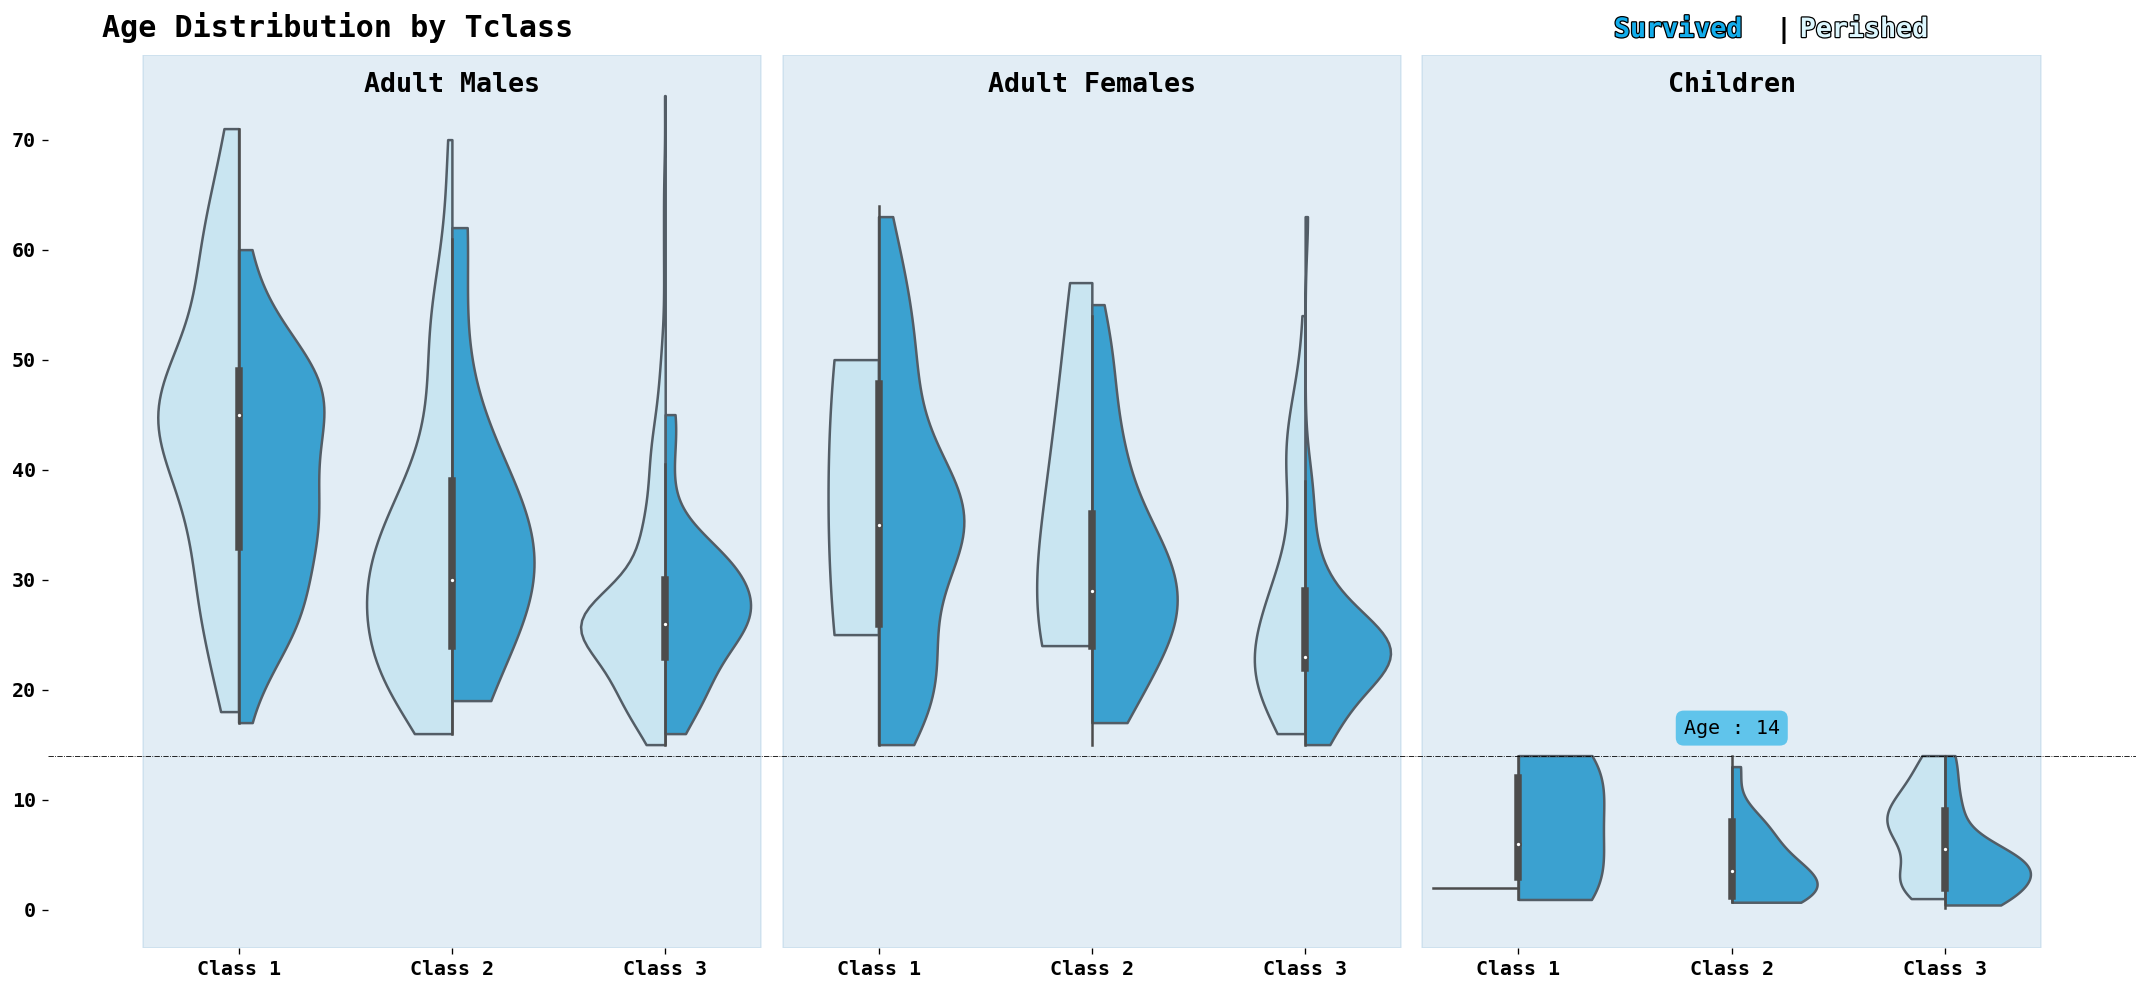

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8), dpi = 120)
sns.violinplot(data = df,
               x = 'Tclass', 
               y = 'Age',
               hue = 'Survived', 
               split = True, 
               cut = 0,
               order = ['Mr1', 'Mr2', 'Mr3', 'Mrs1', 'Mrs2', 'Mrs3', 'Children1', 'Children2', 'Children3'],
               palette = {0 : "#DCF7FE", 1 : "#13ADEB"})
age_max_children = df.groupby(['Title'])['Age'].max()[0]
ax.axhline(age_max_children,
           color = 'black', 
           linewidth = 0.5, 
           linestyle = 'dashdot')
ax.annotate(f"Age : {age_max_children :.0f}", 
            xy = (7, age_max_children + 2.5),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))
ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
ax.set_xlabel('')
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 1', 'Class 2', 'Class 3', 'Class 1','Class 2','Class 3'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_ylabel('')
ax.set_yticks(np.arange(0, 80, 10))
ax.set_yticklabels(np.arange(0, 80, 10), 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.get_legend().remove()
fig.text(0.05, 1, "Age Distribution by Tclass",
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')
fig.text(0.75, 1, 'Survived', 
         fontsize = 16, 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         ha = 'left',
         color = '#13ADEB', 
         path_effects = [pe.withStroke(linewidth = 1.5,
                                       foreground = "black")])
fig.text(0.825, 1, '|', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = 'black')
fig.text(0.836, 1, 'Perished', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = '#DCF7FE', 
         path_effects = [pe.withStroke(linewidth = 1.5, 
                                       foreground = "black")])
# '#D9898F', '#A4BF8A', '#F2CB57'
# '#71A6D1', '#9BC1E3', '#B6DFF6'
color =  ['#71A6D1', '#71A6D1', '#71A6D1']
span_range = [[0, 2], [3, 5], [6, 8]]

for idx, sub_title in enumerate(['Adult Males', 'Adult Females', 'Children']) :
    ax.annotate(sub_title,
                xy = (sum(span_range[idx]) / 2, 75),
                xytext = (0, 0), textcoords = 'offset points',
                va = "center", ha = "center",
                color = "black", fontsize = 16, fontweight = 'bold', fontfamily = 'monospace')
    ax.axvspan(span_range[idx][0] - 0.45, span_range[idx][1] + 0.45,  color = color[idx], alpha = 0.2)
fig.tight_layout()

- Very few females over 60
- All children survive in Pclass 2
- Above age 45, almost all Pclass 3 adulte males expire. Between 20-30 adult males Pclass 3 have a decent survival chance
- Between 0-24 females in Pclass 1 & 2 have an excellent chance of survival

In [63]:
print(f"Survival rate of women under 24 in class 1 & 2 : {len(df[(df.Sex == 'female') & (df.Age < 24) & (df.Pclass != 3) & (df.Survived == True)]) / len(df[(df.Sex == 'female') & (df.Age < 24) & (df.Pclass != 3) & (df.Survived.notnull())]) * 100 :.2f}%")

Survival rate of women under 24 in class 1 & 2 : 97.62%


### Pfare Extraction

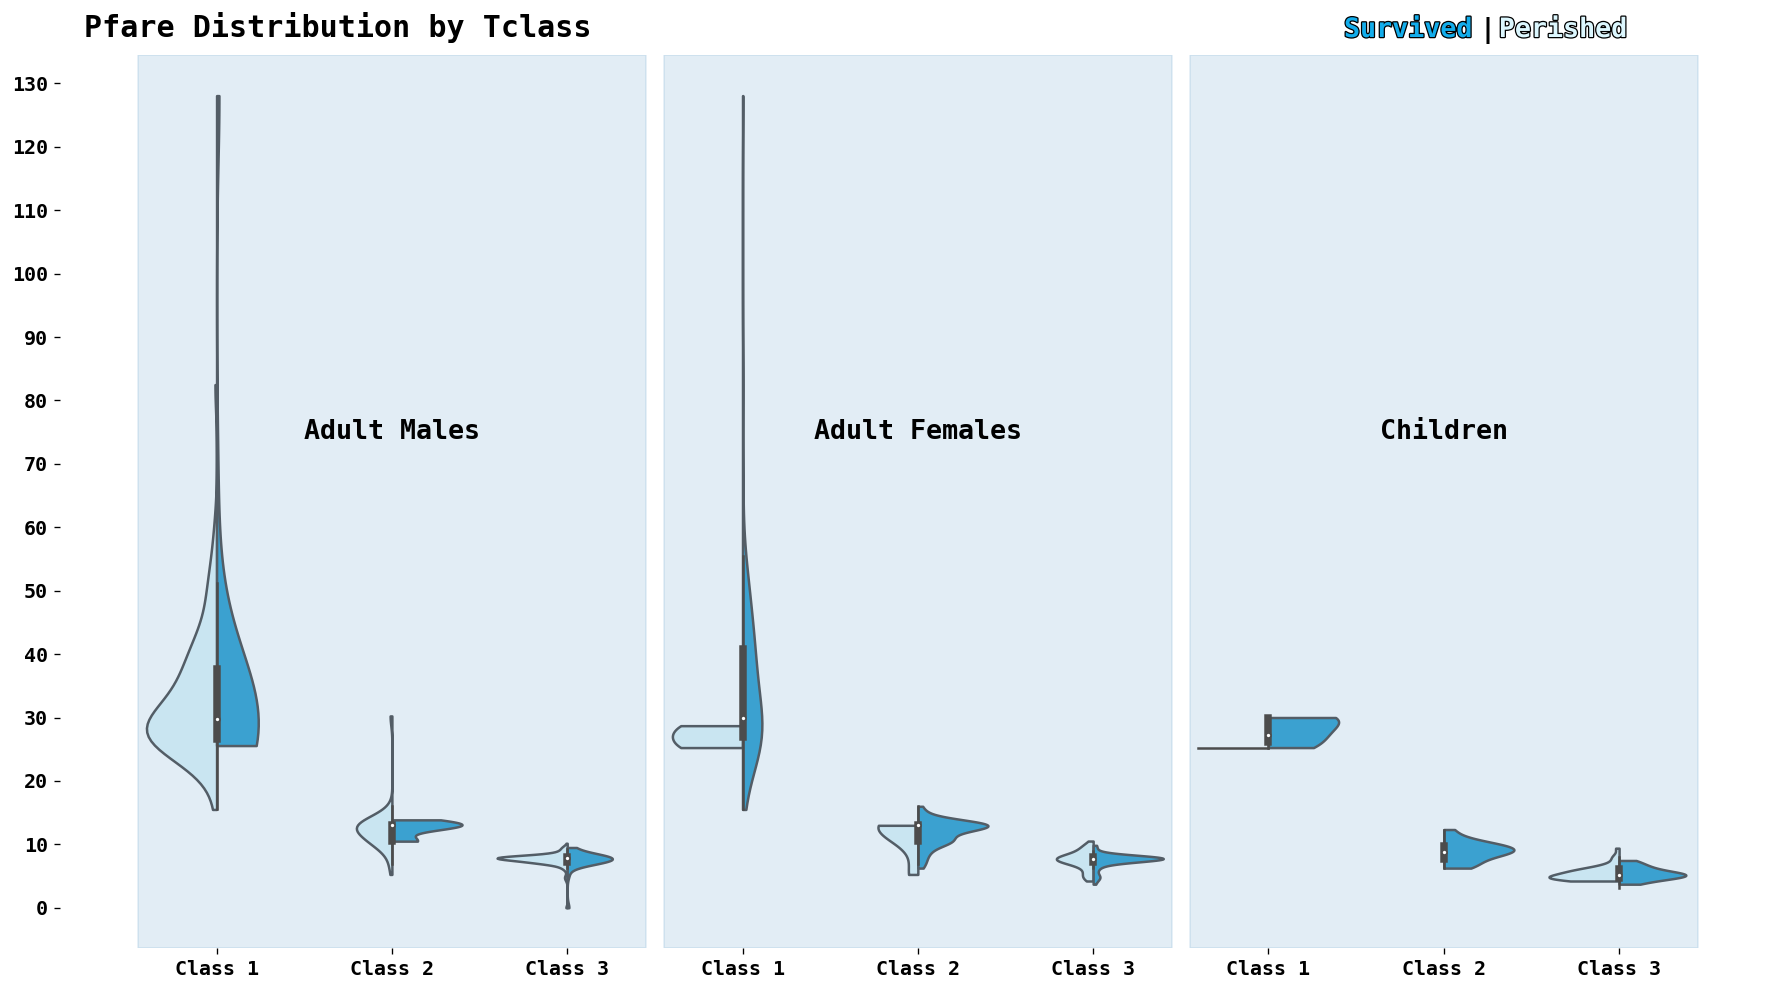

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi = 120)
sns.violinplot(data = df,
               x = 'Tclass', 
               y = 'Pfare',
               hue = 'Survived', 
               split = True, 
               cut = 0,
               order = ['Mr1', 'Mr2', 'Mr3', 'Mrs1', 'Mrs2', 'Mrs3', 'Children1', 'Children2', 'Children3'],
               palette = {0 : "#DCF7FE", 1 : "#13ADEB"})
ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
ax.set_xlabel('')
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3', 'Class 1', 'Class 2', 'Class 3', 'Class 1','Class 2','Class 3'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_ylabel('')
ax.set_yticks(np.arange(0, 140, 10))
ax.set_yticklabels(np.arange(0, 140, 10), 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.get_legend().remove()
fig.text(0.05, 1, "Pfare Distribution by Tclass",
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')
fig.text(0.75, 1, 'Survived', 
         fontsize = 16, 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         ha = 'left',
         color = '#13ADEB', 
         path_effects = [pe.withStroke(linewidth = 1.5,
                                       foreground = "black")])
fig.text(0.825, 1, '|', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = 'black')
fig.text(0.836, 1, 'Perished', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = '#DCF7FE', 
         path_effects = [pe.withStroke(linewidth = 1.5, 
                                       foreground = "black")])
# '#D9898F', '#A4BF8A', '#F2CB57'
# '#71A6D1', '#9BC1E3', '#B6DFF6'
color =  ['#71A6D1', '#71A6D1', '#71A6D1']
span_range = [[0, 2], [3, 5], [6, 8]]

for idx, sub_title in enumerate(['Adult Males', 'Adult Females', 'Children']) :
    ax.annotate(sub_title,
                xy = (sum(span_range[idx]) / 2, 75),
                xytext = (0, 0), textcoords = 'offset points',
                va = "center", ha = "center",
                color = "black", fontsize = 16, fontweight = 'bold', fontfamily = 'monospace')
    ax.axvspan(span_range[idx][0] - 0.45, span_range[idx][1] + 0.45,  color = color[idx], alpha = 0.2)
fig.tight_layout()

In [27]:
pd.crosstab(df.Title_Encoding, df.Survived, margins = True)  

Survived,0.0,1.0,All
Title_Encoding,,,
0,41,46,87
1,447,86,533
2,61,210,271
All,549,342,891


In [28]:
adult_males_survivors = df.query('Title_Encoding == 0 & Survived == 1')
adult_males_perished = df.query('Title_Encoding == 0 & Survived == 0')

In [29]:
print('adult_males_survivors :')
display(adult_males_survivors.describe())
print('adult_males_perished :')
display(adult_males_perished.describe())

adult_males_survivors :


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Title_Encoding
count,44.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0
mean,4.503864,30.134328,1.282609,438.282609,2.434783,0.913043,1.0,0.0
std,3.816865,29.717682,0.583592,267.155274,0.654970,0.914721,0.0,0.0
min,0.420000,8.516700,0.000000,11.000000,1.000000,0.000000,1.0,0.0
25%,1.000000,15.369775,1.000000,187.250000,2.000000,0.000000,1.0,0.0
50%,4.000000,20.550000,1.000000,446.500000,3.000000,1.000000,1.0,0.0
75%,6.000000,30.790625,2.000000,705.500000,3.000000,1.000000,1.0,0.0
max,14.000000,151.550000,2.000000,870.000000,3.000000,4.000000,1.0,0.0


adult_males_perished :


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Title_Encoding
count,40.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0
mean,7.050000,35.517178,1.463415,399.390244,2.951220,3.512195,0.0,0.0
std,4.069587,23.140722,0.552158,298.576027,0.312348,1.831965,0.0,0.0
min,1.000000,7.854200,0.000000,8.000000,1.000000,0.000000,0.0,0.0
25%,3.000000,25.466700,1.000000,160.000000,3.000000,3.000000,0.0,0.0
50%,7.000000,29.125000,1.000000,375.000000,3.000000,4.000000,0.0,0.0
75%,10.000000,39.687500,2.000000,684.000000,3.000000,4.000000,0.0,0.0
max,14.000000,151.550000,2.000000,889.000000,3.000000,8.000000,0.0,0.0


In [30]:
print('adult_males_survivors :')
display(adult_males_survivors.stb.counts())
print('adult_males_perished :')
display(adult_males_perished.stb.counts())

adult_males_survivors :


,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Survived,46,1,1.0,46,1.0,46
Title,46,1,Children,46,Children,46
Title_Encoding,46,1,0,46,0,46
Embarked,46,2,S,33,C,13
Sex,46,2,female,23,female,23
Parch,46,3,1,27,0,3
Pclass,46,3,3,24,1,4
SibSp,46,4,1,24,4,2
Cabin,11,8,F4,2,G6,1
Age,44,18,4.0,7,0.92,1


adult_males_perished :


,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Survived,41,1,0.0,41,0.0,41
Title,41,1,Children,41,Children,41
Title_Encoding,41,1,0,41,0,41
Cabin,2,2,G6,1,G6,1
Pclass,41,2,3,40,1,1
Sex,41,2,male,21,female,20
Embarked,41,3,S,35,C,2
Parch,41,3,1,20,0,1
SibSp,41,7,4,14,2,1
Age,40,13,2.0,7,5.0,1


# **<div class="alert alert-danger"> 🛠 WORK IN PROGRESS 🛠</div>**

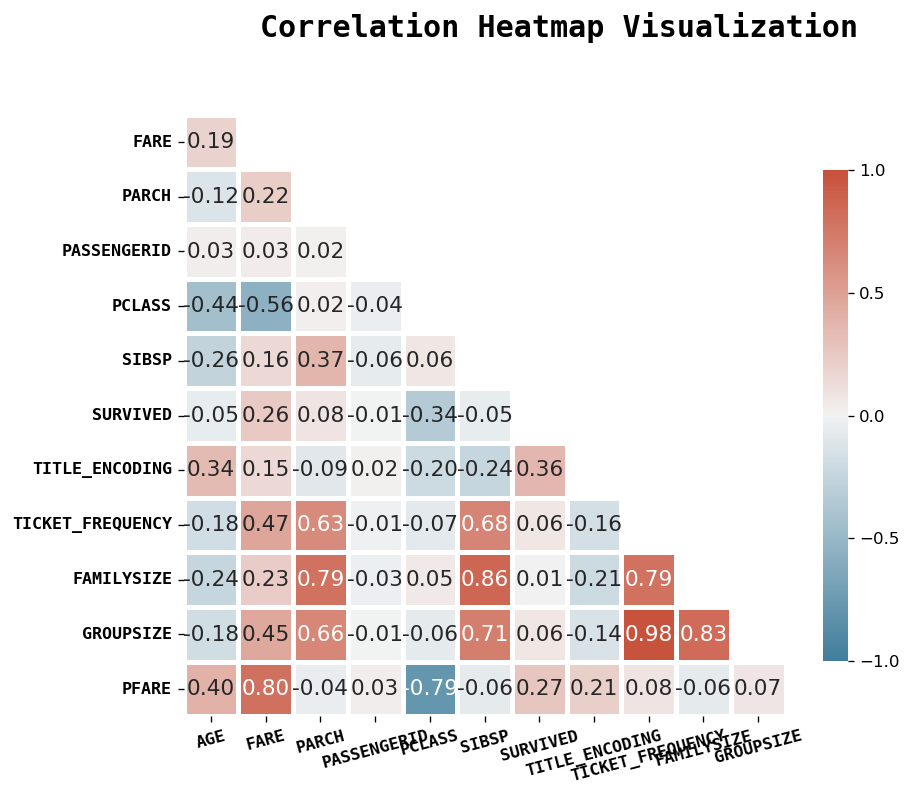

In [64]:
fig, ax = plt.subplots(figsize = (8, 7), dpi = 120)
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:, :-1]
cmap = sns.diverging_palette(230, 18, as_cmap = True)
sns.heatmap(corr,
            annot = True, 
            fmt = '.2f',  
            vmin = -1, 
            vmax = 1, 
            center = 0, 
            cmap = cmap,
            linewidth = 3,
            mask = mask,
            cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1], "shrink": .65},
            annot_kws = {'size': 13},
            square = True)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], 
           labels = yticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 0)
plt.xticks(plt.xticks()[0], 
           labels = xticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 15)
fig.text(0.90, 0.98, 'Correlation Heatmap Visualization', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'right')
plt.tight_layout()

Measure of association between two categorical features

In [65]:
# Calculate Cramers V statistic for categorial-categorial association
def cramers_corrected_stat(x, y) :
    result= - 1
    if len(x.value_counts()) == 1 :
        print("First variable is constant")
    elif len(y.value_counts()) == 1 :
        print("Second variable is constant")
    else:   
        conf_matrix = pd.crosstab(x, y)

        if conf_matrix.shape[0] == 2 :
            correct = False
        else :
            correct = True

        chi2 = ss.chi2_contingency(conf_matrix, correction = correct)[0]
        n = sum(conf_matrix.sum())
        phi2 = chi2 / n
        r, k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        result = np.sqrt(phi2corr / min( (kcorr - 1), (rcorr - 1)))
    return round(result, 6)

In [66]:
cramers_corrected_stat(df['Pclass'], df['Survived'])

0.336684

In [67]:
def get_cramer_v(x, y):
    n = len(x)
    cont_table = pd.crosstab(x, y)
    chi_2 = ss.chi2_contingency(cont_table, correction=False)[0]
    v = np.sqrt(chi_2 / (n * (np.min(cont_table.shape) - 1)))
    return v

get_cramer_v(df['Pclass'], df['Survived'])

0.2803590799636696

The most common interpretation of the magnitude of the Cramer’s V is as follows :
- Small Effect Size: V ≤ 0.2
- Medium Effect Size: 0.2 < V ≤ 0.6
- Large Effect Size: 0.6 < V

In [68]:
def Correlation_ratio(categories, values) :
    cat = np.unique(categories, return_inverse = True)[1]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup - np.mean(subgroup)) ** 2)
        ssb += len(subgroup) * (np.mean(subgroup) - np.mean(values)) ** 2

    return (ssb / (ssb + ssw)) ** .5

coef = Correlation_ratio(df['Pclass'], df['Fare'])

print(f'Eta Squared : {coef ** 2 :.4f}\nEta : {coef :.4f}')

Eta Squared : nan
Eta : nan


The following rules of thumb are used to interpret values for [Eta Squared](https://www.statology.org/eta-squared/) :
- .01 ~ Small effect size
- .06 ~ Medium effect size
- .14 or higher ~ Large effect size

[Text(0, 0, 'Pclass 1')]

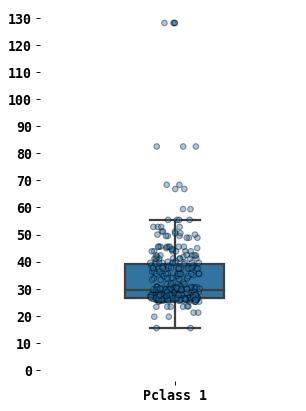

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (4, 6), dpi = 80)
sns.boxplot(data = df.query('Pclass == 1'),
            y = "Pfare",         
            #dodge = True,
            width = 0.4,         # The width of the boxes
            #color = "#13ADEB", 
            linewidth = 2,       # Thickness of the box lines
            showfliers = False)  # Sop showing the fliers
sns.stripplot(data = df.query('Pclass == 1'),
              y = "Pfare",      
              hue = 'Survived',
              #dodge = True,
              #color = '#13ADEB', 
              linewidth = 1,     # Dot outline width
              edgecolor = 'black',
              alpha = 0.4)       # Makes them transparent
sns.despine(offset = 10, trim = True)
# Spines
for s in ["top","left", "right", 'bottom'] :
    ax.spines[s].set_visible(False)
ax.set_yticks(np.arange(0, 140, 10))
ax.set_yticklabels((np.arange(0, 140, 10)), fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.set_ylabel('')
ax.set_xticks([0])
ax.set_xticklabels(['Pclass 1'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)

<AxesSubplot:ylabel='Pfare'>

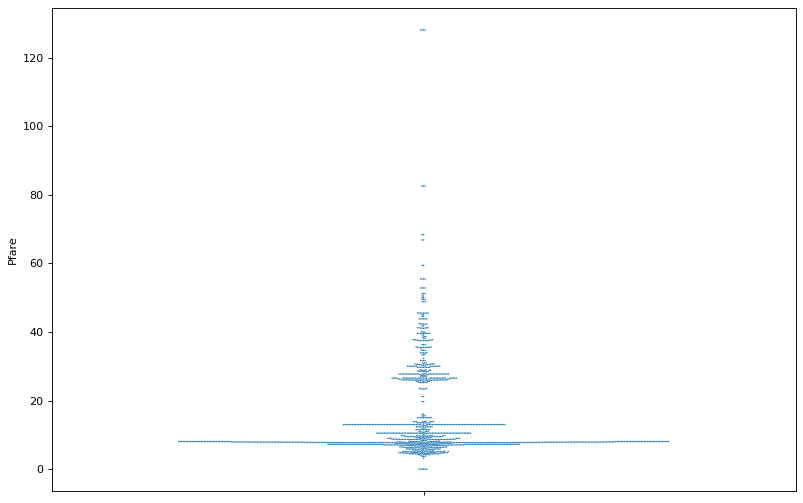

In [70]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.swarmplot(y= df['Pfare'], size = 1.3, data= df.query('Pclass == 1'))
#sns.stripplot(x='Pclass', y=df['Pfare'], data=df, ax=ax[1])

In [71]:
df.query('Pclass == 1')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2,2,35.64165,Mrs1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2,2,26.55000,Mrs1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,2,1,2,25.93125,Mr1
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Mrs,2,1,1,1,26.55000,Mrs1
23,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,24,1,male,0,1.0,113788,Mr,1,1,1,1,35.50000,Mr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,17.0,NaN,S,47.1000,"Carrau, Mr. Jose Pedro",0,1295,1,male,0,NaN,113059,Mr,1,2,1,2,23.55000,Mr1
1295,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,Mr,1,1,2,2,27.72080,Mr1
1298,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,Mr,1,5,3,5,42.30000,Mr1
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,Mrs,2,3,2,3,30.00000,Mrs1


In [72]:
df[df.Pclass == 1]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2,2,35.64165,Mrs1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2,2,26.55000,Mrs1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,2,1,2,25.93125,Mr1
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Mrs,2,1,1,1,26.55000,Mrs1
23,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,24,1,male,0,1.0,113788,Mr,1,1,1,1,35.50000,Mr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,17.0,NaN,S,47.1000,"Carrau, Mr. Jose Pedro",0,1295,1,male,0,NaN,113059,Mr,1,2,1,2,23.55000,Mr1
1295,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,Mr,1,1,2,2,27.72080,Mr1
1298,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,Mr,1,5,3,5,42.30000,Mr1
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,Mrs,2,3,2,3,30.00000,Mrs1


In [73]:
df['Gfare'] = df.Fare / df.GroupSize

<AxesSubplot:xlabel='Pclass', ylabel='Pfare'>

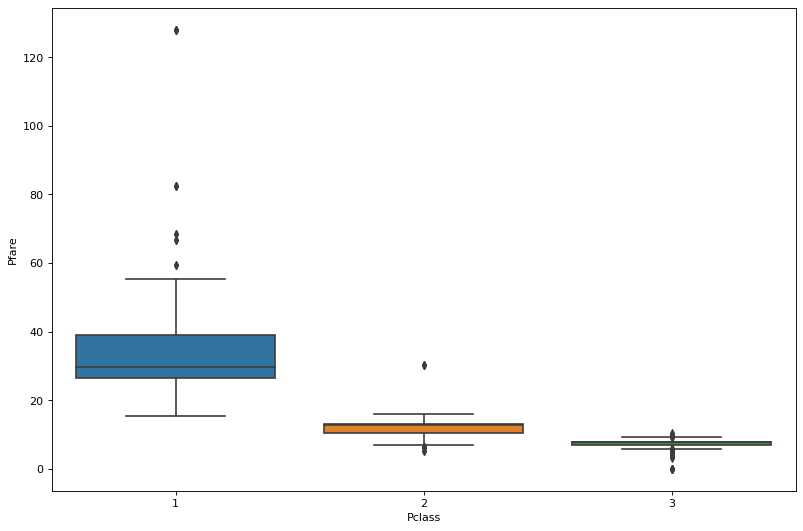

In [74]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.boxplot(data = df, y = df.Pfare, x = df.Pclass)

<AxesSubplot:xlabel='Pclass', ylabel='Gfare'>

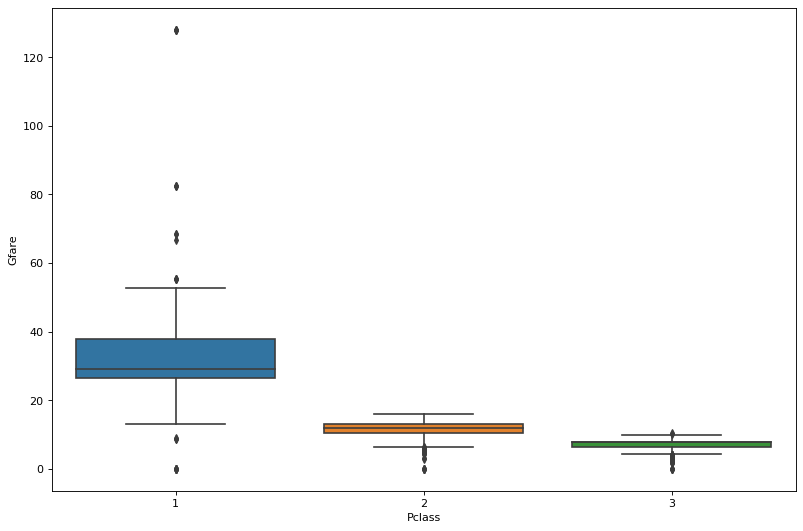

In [75]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.boxplot(data = df, y = df.Gfare, x = df.Pclass)

In [76]:
df.groupby(['Pclass', 'Embarked']).agg(Mean_Pfare = ('Pfare', 'mean'), 
                                    Median_Pfare = ('Pfare', 'median'), 
                                    Min_Pfare = ('Pfare', 'min'), 
                                    Max_Pfare = ('Pfare', 'max'))

Mean_Pfare  Median_Pfare  Min_Pfare  Max_Pfare
Pclass Embarked                                                
1      C          38.324320       34.6500  15.500000  128.08230
       Q          30.000000       30.0000  30.000000   30.00000
       S          32.064175       27.2861  15.500000   66.82500
2      C          13.281393       13.8583  10.394800   15.57920
       Q          11.735114       12.3500   9.687500   12.35000
       S          11.721384       13.0000   5.250000   30.25000
3      C           6.843819        7.2271   4.012500    9.39375
       Q           7.577325        7.7500   4.854167    8.45830
       S           7.286401        7.7958   0.000000   10.51670

In [77]:
df.groupby(['Pclass', 'Embarked']).agg(Mean_Pfare = ('Gfare', 'mean'), 
                                    Median_Pfare = ('Gfare', 'median'), 
                                    Min_Pfare = ('Gfare', 'min'), 
                                    Max_Pfare = ('Gfare', 'max'))

Mean_Pfare  Median_Pfare  Min_Pfare  Max_Pfare
Pclass Embarked                                                
1      C          37.558998     31.679200  13.860400  128.08230
       Q          30.000000     30.000000  30.000000   30.00000
       S          29.655796     26.550000   0.000000   66.82500
2      C          12.786454     13.333350   6.929150   15.57920
       Q          11.735114     12.350000   9.687500   12.35000
       S          10.796866     10.916667   0.000000   16.00000
3      C           6.547400      7.225000   1.807300    9.39375
       Q           7.417295      7.750000   2.583333    8.45830
       S           6.995193      7.775000   0.000000   10.51670

In [78]:
df.loc[(df.Gfare < 20) & (df.Pclass == 1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass,Gfare
136,19.0,D47,S,26.2833,"Newsom, Miss. Helen Monypeny",2,137,1,female,0,1.0,11752,Mrs,2,1,3,3,26.2833,Mrs1,8.761100
248,37.0,D35,S,52.5542,"Beckwith, Mr. Richard Leonard",1,249,1,male,1,1.0,11751,Mr,1,2,3,3,26.2771,Mr1,17.518067
263,45.0,B94,S,0.0000,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,Mr,1,1,1,1,27.7208,Mr1,0.000000
270,28.0,NaN,S,31.0000,"Cairns, Mr. Alexander",0,271,1,male,0,0.0,113798,Mr,1,2,1,2,15.5000,Mr1,15.500000
273,37.0,C118,C,29.7000,"Natsch, Mr. Charles H",1,274,1,male,0,0.0,PC 17596,Mr,1,1,2,2,29.7000,Mr1,14.850000
539,22.0,B39,C,49.5000,"Frolicher, Miss. Hedwig Margaritha",2,540,1,female,0,1.0,13568,Mrs,2,1,3,3,49.5000,Mrs1,16.500000
556,48.0,A16,C,39.6000,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",0,557,1,female,1,1.0,11755,Mrs,2,1,2,2,39.6000,Mrs1,19.800000
571,53.0,C101,S,51.4792,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,572,1,female,2,1.0,11769,Mrs,2,2,3,3,25.7396,Mrs1,17.159733
633,29.0,NaN,S,0.0000,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,Mr,1,1,1,1,27.7208,Mr1,0.000000
806,39.0,A36,S,0.0000,"Andrews, Mr. Thomas Jr",0,807,1,male,0,0.0,112050,Mr,1,1,1,1,27.7208,Mr1,0.000000


In [79]:
df.loc[(df.Pfare > 15) & (df.Pclass == 2)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass,Gfare
9,17.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,2,2,2,15.0354,Mrs2,15.0354
15,55.0,NaN,S,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,female,0,1.0,248706,Mrs,2,1,1,1,16.0000,Mrs2,16.0000
122,32.5,NaN,C,30.0708,"Nasser, Mr. Nicholas",0,123,2,male,1,0.0,237736,Mr,1,2,2,2,15.0354,Mr2,15.0354
135,23.0,NaN,C,15.0458,"Richard, Mr. Emile",0,136,2,male,0,0.0,SC/PARIS 2133,Mr,1,1,1,1,15.0458,Mr2,15.0458
181,30.0,NaN,C,15.0500,"Pernot, Mr. Rene",0,182,2,male,0,0.0,SC/PARIS 2131,Mr,1,1,1,1,15.0500,Mr2,15.0500
277,21.0,NaN,S,0.0000,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853,Mr,1,3,1,3,30.2500,Mr2,0.0000
413,21.0,NaN,S,0.0000,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853,Mr,1,3,1,3,30.2500,Mr2,0.0000
466,20.0,NaN,S,0.0000,"Campbell, Mr. William",0,467,2,male,0,0.0,239853,Mr,1,3,1,3,30.2500,Mr2,0.0000
942,27.0,NaN,C,15.0333,"Pulbaum, Mr. Franz",0,943,2,male,0,NaN,SC/PARIS 2168,Mr,1,1,1,1,15.0333,Mr2,15.0333
945,30.0,NaN,C,15.5792,"Mangiavacchi, Mr. Serafino Emilio",0,946,2,male,0,NaN,SC/A.3 2861,Mr,1,1,1,1,15.5792,Mr2,15.5792


In [80]:
df[['FamilySize','Ticket_frequency']].max()

FamilySize          11
Ticket_frequency    11
dtype: int64

In [81]:
df['GroupSize'] = df[['FamilySize','Ticket_frequency']].max(axis = 1)

<AxesSubplot:xlabel='GroupSize', ylabel='count'>

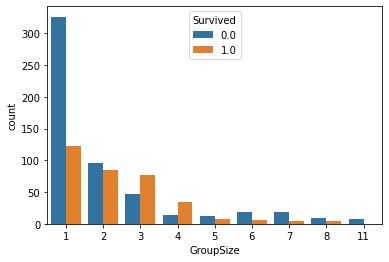

In [82]:
sns.countplot(x='GroupSize', hue='Survived', data=df)

In [83]:
df['Surname'] = df['Name'].apply(lambda x: x[:x.find(',')])

In [84]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass,Gfare,Surname
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,A/5 21171,Mr,1,1,2,2,7.25000,Mr3,3.62500,Braund
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,Mrs,2,2,2,2,35.64165,Mrs1,35.64165,Cumings
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,STON/O2. 3101282,Mrs,2,1,1,1,7.92500,Mrs3,7.92500,Heikkinen
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,113803,Mrs,2,2,2,2,26.55000,Mrs1,26.55000,Futrelle
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,373450,Mr,1,1,1,1,8.05000,Mr3,8.05000,Allen


In [85]:
df['Name_frequency'] = df.groupby(['Surname'])['Surname'].transform('count')

<AxesSubplot:xlabel='Name_frequency', ylabel='count'>

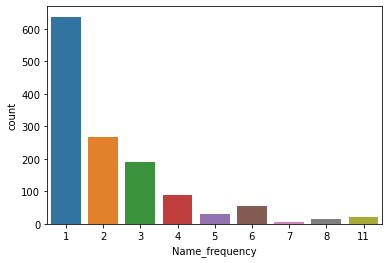

In [86]:
sns.countplot(data = df, x = df.Name_frequency)

In [87]:
df[(df['Name_frequency'] == 11) & (df['FamilySize'] == 1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title,Title_Encoding,Ticket_frequency,FamilySize,GroupSize,Pfare,Tclass,Gfare,Surname,Name_frequency
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",0,69,3,female,0,...,Mrs,2,1,1,1,7.9250,Mrs3,7.9250,Andersson,11
146,27.0,NaN,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,147,3,male,0,...,Mr,1,1,1,1,7.7958,Mr3,7.7958,Andersson,11
1105,38.0,NaN,S,7.7750,"Andersson, Miss. Ida Augusta Margareta",0,1106,3,female,0,...,Mrs,2,1,1,1,7.7750,Mrs3,7.7750,Andersson,11
1211,26.0,NaN,S,7.7750,"Andersson, Mr. Johan Samuel",0,1212,3,male,0,...,Mr,1,1,1,1,7.7750,Mr3,7.7750,Andersson,11
